<img align="left" src="https://iili.io/HXJBlj9.jpg" style="height:90px" style="width:30px"/>
<br>

# <a id='toc1_'></a>[Advanced Techniques in Supervised Machine Learning: Linear Regression Deep Dive](#toc0_)

<table>
    <tr>
        <td>
            <img src="assets/kostiantyn-li-1sCXwVoqKAw-unsplash.jpg" alt="Health Insurance" width="1900"/>
        </td>
        <td>
            <strong>Dataset Attribution and Licensing:</strong><br>
            The dataset used in this project has been sourced from Kaggle, from the "California Housing Prices" dataset.<br>
            The original dataset can be found on <a href="https://www.kaggle.com/datasets/camnugent/california-housing-prices">Kaggle</a>.<br>
            <br>
            The CC0 1.0 Universal (CC0 1.0) Public Domain Dedication allows creators to waive all their copyright and related rights in their work worldwide. This enables others to copy, modify, distribute, and perform the work, even for commercial purposes, without needing permission. The dedication also includes disclaimers regarding warranties and liability, emphasizing that the use of the work does not imply endorsement by the author. For more details, please visit the <a href="https://creativecommons.org/publicdomain/zero/1.0/">Creative Commons CC0 1.0 page.</a>.
            <br>
            <br>
        </td>
    </tr>
</table>

<br>

<hr style="border:1px solid #4A90E2"> </hr>

## <a id='toc1_1_'></a>[Project Overview](#toc0_)

Building on "Fundamentals of Supervised Machine Learning: OLS Linear Regression," this segment advances our exploration into machine learning with a focus on California's housing market. This installment aims to deepen our analysis through:

- **Diverse Distribution Analysis**: Investigating right-scewed and bimodal distributions to understand their impact on modeling.
  
- **Enhanced Data Preprocessing**: Addressing outliers and missing values through strategic imputation, ensuring data integrity.
  
- **Foundational Feature Engineering**: Utilizing arithmetic and statistical methods for insightful feature creation.
  
- **Advanced EDA**: Employing a variety of EDA techniques to reveal patterns affecting our target variable, enhancing feature visualization, and tackling data sparsity.
  
- **Modeling Foundations**: Introducing techniques like dummy encoding and OLS regression for refined feature selection and deeper data insights.
  
- **Optimized Modeling with scikit-learn**: Leveraging sklearn for a streamlined modeling approach, incorporating in-pipeline imputation and encoding.

- **Incorporation of Polynomial Features**: Implementing polynomial transformations to capture non-linear relationships, enhancing model accuracy.

- **Log Transformation**: Applying log transformations to address right-skewed distributions and reduce the influence of outliers, stabilizing variance across the dataset.

- **Regularization Techniques**: Utilizing Ridge and Lasso regularization to combat overfitting, aiding in the model's ability to generalize better to unseen data.

- **Quantile Regression Insights**: Highlighting the precision of our modeling for different value ranges, especially lower-value properties, by implementing Quantile Regression. This method is particularly effective for data with skewed distributions and outliers, providing a more nuanced understanding of the dataset and improving the robustness of our predictions.

- **Result Analysis**: Evaluating our model against non-normally distributed data challenges, highlighting the importance of tailored modeling strategies.

Part 2 enriches our machine learning journey, offering advanced insights and techniques to master supervised learning's complexities.

**Table of contents**<a id='toc0_'></a>    
- [Advanced Techniques in Supervised Machine Learning: Linear Regression Deep Dive](#toc1_)    
  - [Project Overview](#toc1_1_)    
  - [Data Exploration and Refinement](#toc1_2_)    
    - [Histograms](#toc1_2_1_)    
      - [Goodness-of-fit test for housing_median_age](#toc1_2_1_1_)    
    - [Handling Missing Values](#toc1_2_2_)    
    - [Feature Engineering](#toc1_2_3_)    
    - [Managing Outliers](#toc1_2_4_)    
  - [EDA](#toc1_3_)    
    - [Target Variable Correlations](#toc1_3_1_)    
      - [Correlation Table](#toc1_3_1_1_)    
    - ['Median Income': A Principal Predictor](#toc1_3_2_)    
      - [Exploring the Core Predictor Distribution](#toc1_3_2_1_)    
      - [Visualizing Correlation: Income and House Value](#toc1_3_2_2_)    
      - [Density Insights: Contour Visualization](#toc1_3_2_3_)    
    - [Feature Creation: Income Categories](#toc1_3_3_)    
    - [Income and Ocean Proximity](#toc1_3_4_)    
      - [Income Levels and Coastal Proximity: A Visual Correlation](#toc1_3_4_1_)    
      - [Variability and Value: Insights from Income and Proximity](#toc1_3_4_2_)    
      - [Income and Ocean Proximity: Heatmap Analysis](#toc1_3_4_3_)    
  - [`OLS`: Analytical Primer to Inform Linear Modeling](#toc1_4_)    
    - [7 Classical Assumptions of OLS and Linear Regression](#toc1_4_1_)    
    - [Helper Functions](#toc1_4_2_)    
    - [Dummy Encoding](#toc1_4_3_)    
    - [Data Split: Test/Train](#toc1_4_4_)    
    - [Round 1 Analysis](#toc1_4_5_)    
    - [ Round 2 Analysis](#toc1_4_6_)    
    - [`OLS` Analysis Conclusion](#toc1_4_7_)    
    - [Residual Analysis](#toc1_4_8_)    
      - [Residual Analysis Summary](#toc1_4_8_1_)    
      - [Next Steps: Linear Regression with `scikit-learn`](#toc1_4_8_2_)    
  - [Linear Regression](#toc1_5_)    
    - [Reload Data and Train/Test Split](#toc1_5_1_)    
    - [Building and Training Our Model](#toc1_5_2_)    
      - [Regular Linear Regression](#toc1_5_2_1_)    
      - [Polynomial Transformation](#toc1_5_2_2_)    
      - [Ridge Regularization and Polynomial Transformation](#toc1_5_2_3_)    
      - [Lasso Regularization, Polynomial Transformation, and Log Transformation](#toc1_5_2_4_)    
      - [Analyzing Actual vs Predicted Values](#toc1_5_2_5_)    
      - [Impact of Dropping vs. Imputing 'Total Bedrooms' (Regular Linear Regression)](#toc1_5_2_6_)    
    - [Final Prediction: Linear Regression Model](#toc1_5_3_)    
  - [Quantile Regression](#toc1_6_)    
    - [Model Training: Quantile Regression](#toc1_6_1_)    
    - [Comparison: Quantile Regressor vs Linear Lasso Regressor](#toc1_6_2_)    
      - [Mean Absolute Error Analysis](#toc1_6_2_1_)    
      - [Model Comparison Analysis](#toc1_6_2_2_)    
  - [Conclusion](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Data Exploration and Refinement](#toc0_)

Explanation of the features we are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms:** sum of all rooms in district
5. **total_bedrooms:** sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** district's proximity to the ocean

In [118]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings

# Filter out future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [119]:
df = pd.read_csv("housing.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [120]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [121]:
print(df.describe(include='object'))

       ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136


In [122]:
print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


---
### <a id='toc1_2_1_'></a>[Histograms](#toc0_)
Histograms of all numeric columns in order to get a good understanding of the distribution of the data points. Here's what we can discern:
- `longitude`: bimodal distribution; left skew.
- `latitude`: bimodal distribution; right skew.
- `housing_median_age`: potentially a multimodal distribution.
- `total_rooms`: right-skewed distribution, indicating a long tail towards higher values.
- `total_bedrooms`: right-skewed distribution, indicating a long tail towards higher values.
- `population`: right-skewed distribution, indicating a long tail towards higher values.
- `households`: right-skewed distribution, indicating a long tail towards higher values.
- `median_income`: right-skewed distribution, indicating a long tail towards higher values.
- `median_house_value`: right-skewed distribution, with a cluster of high values.
- `ocean_proximity`: right-skewed distribution, with a cluster of high values.


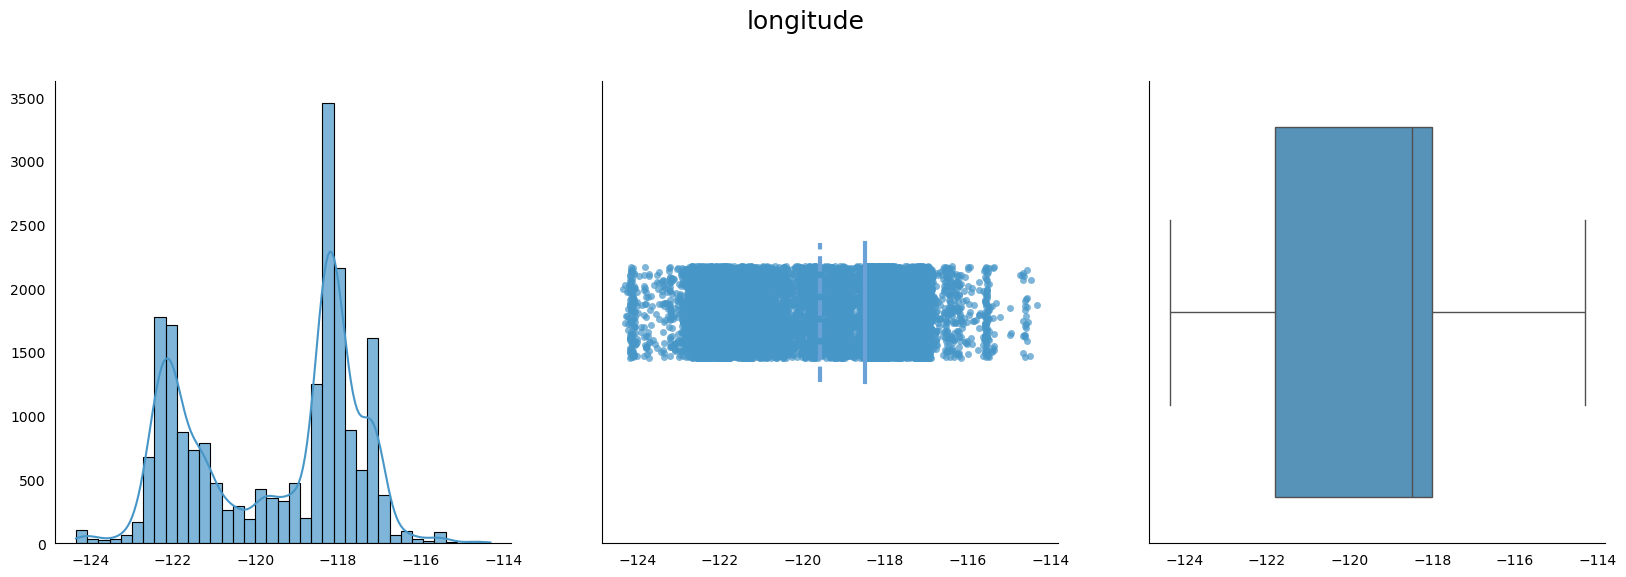

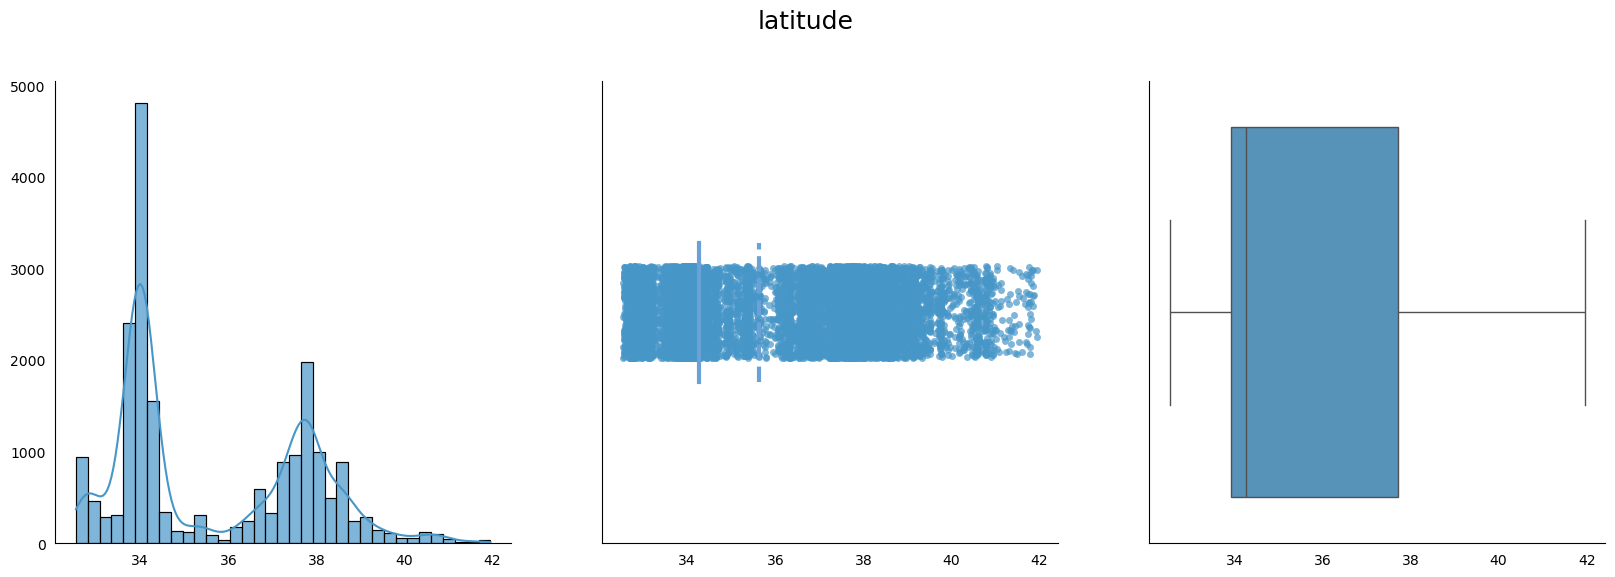

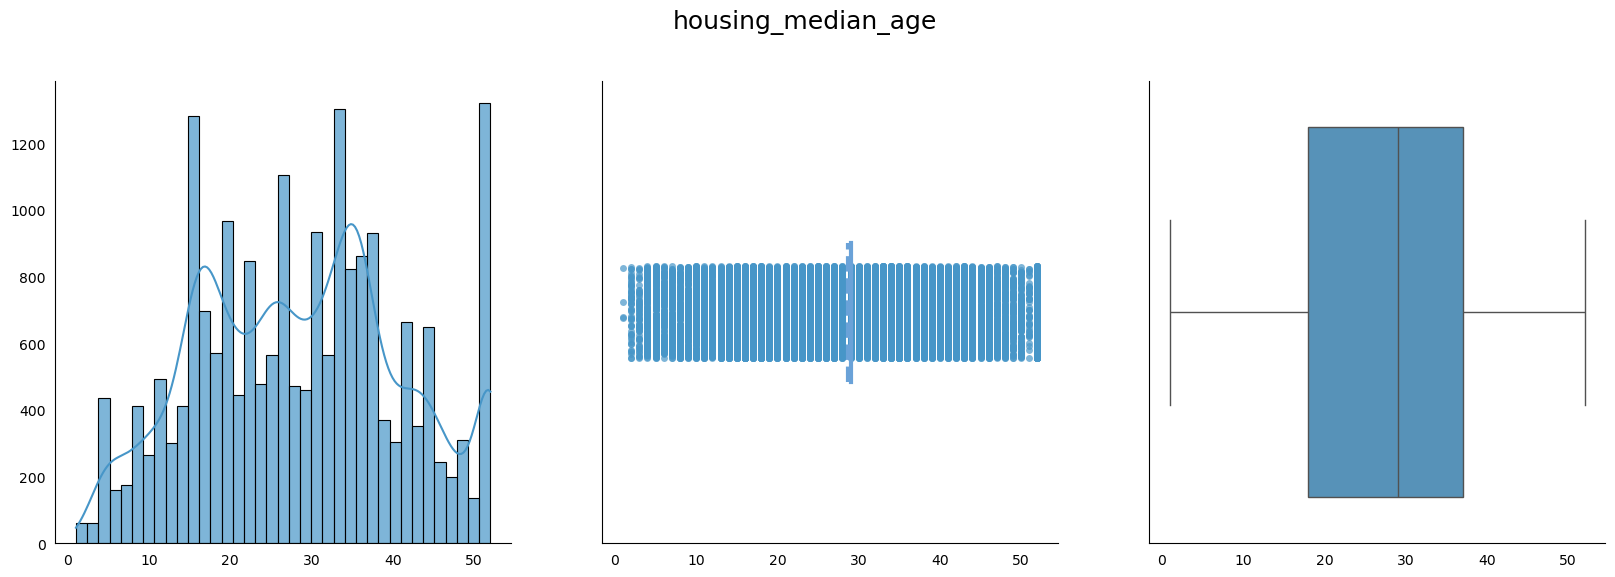

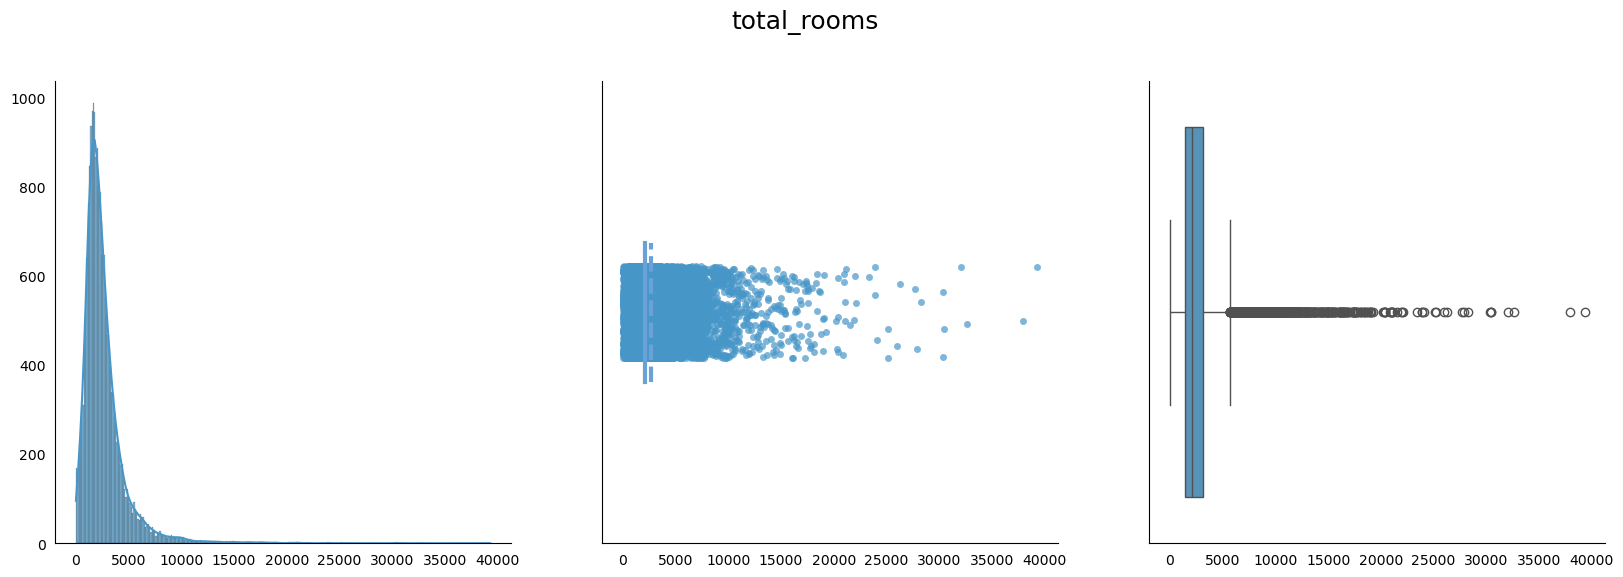

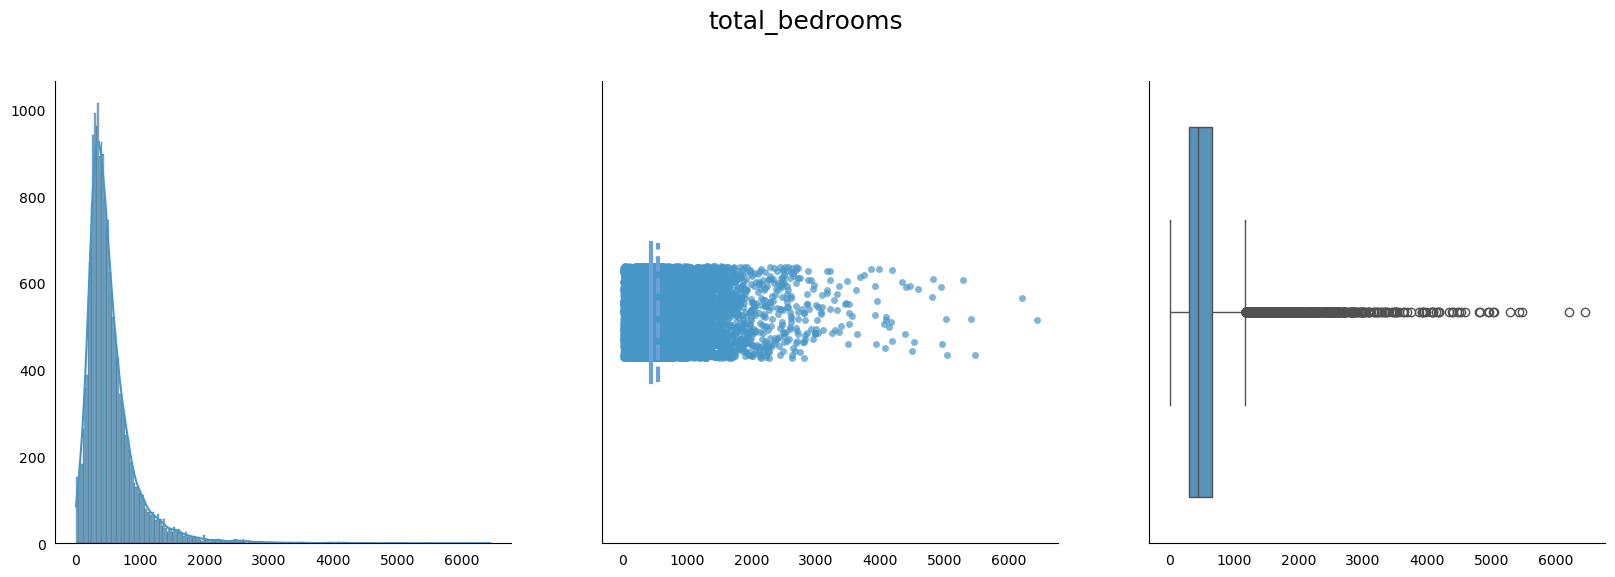

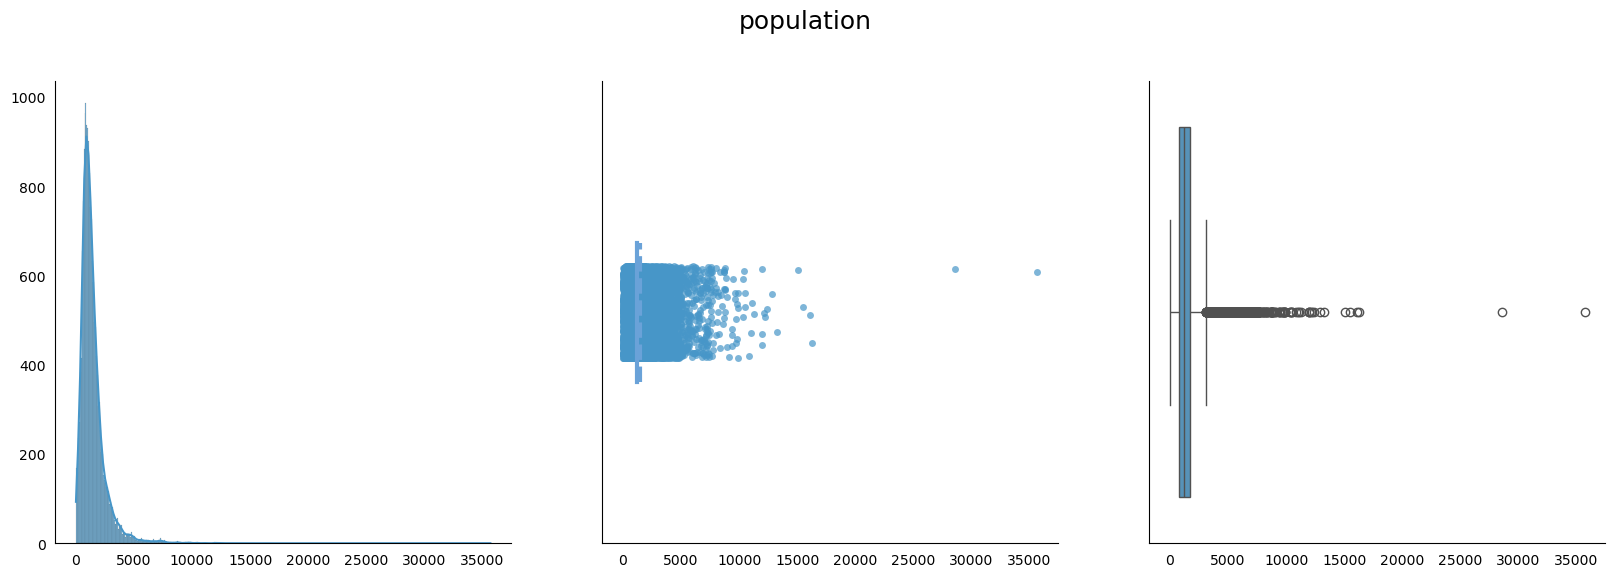

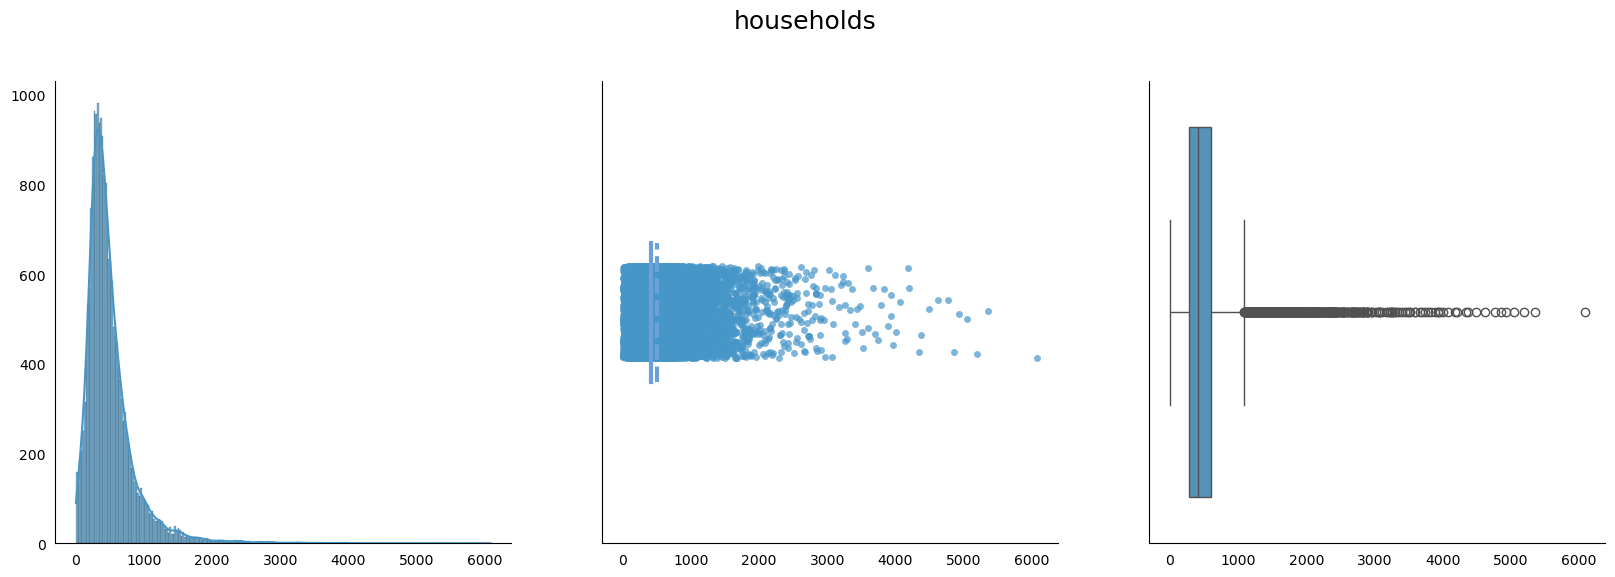

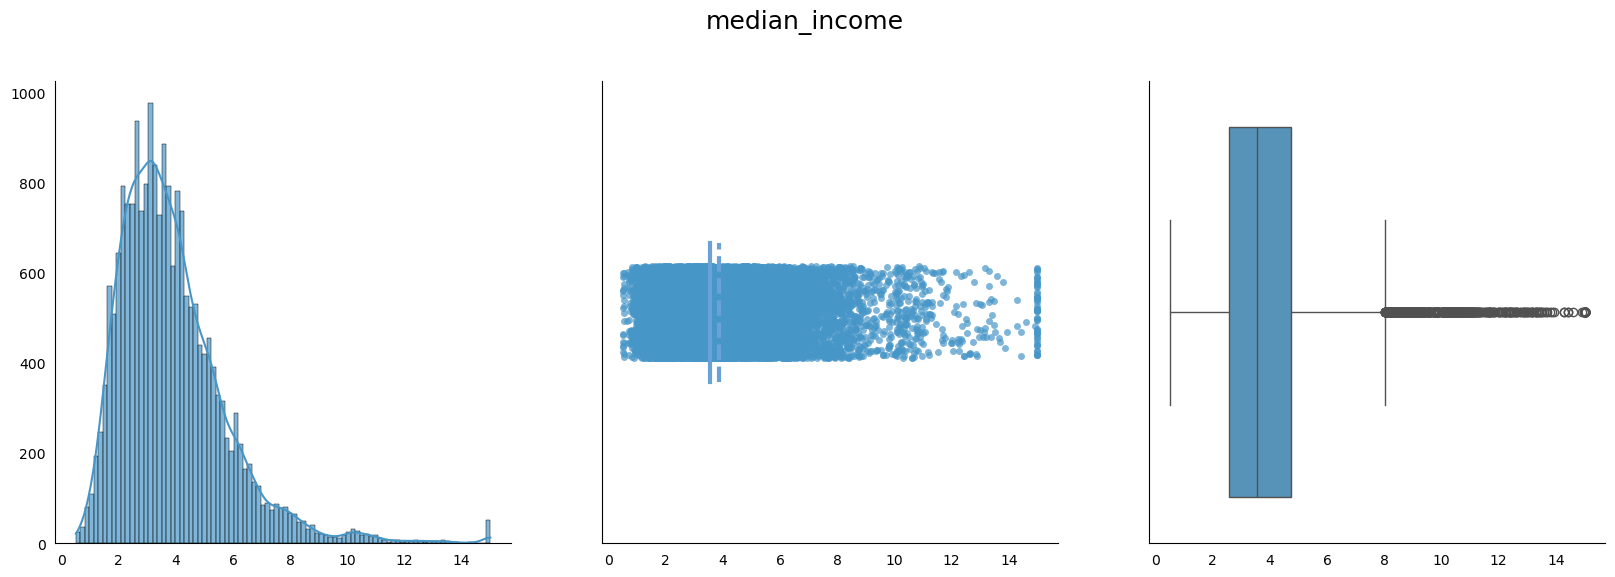

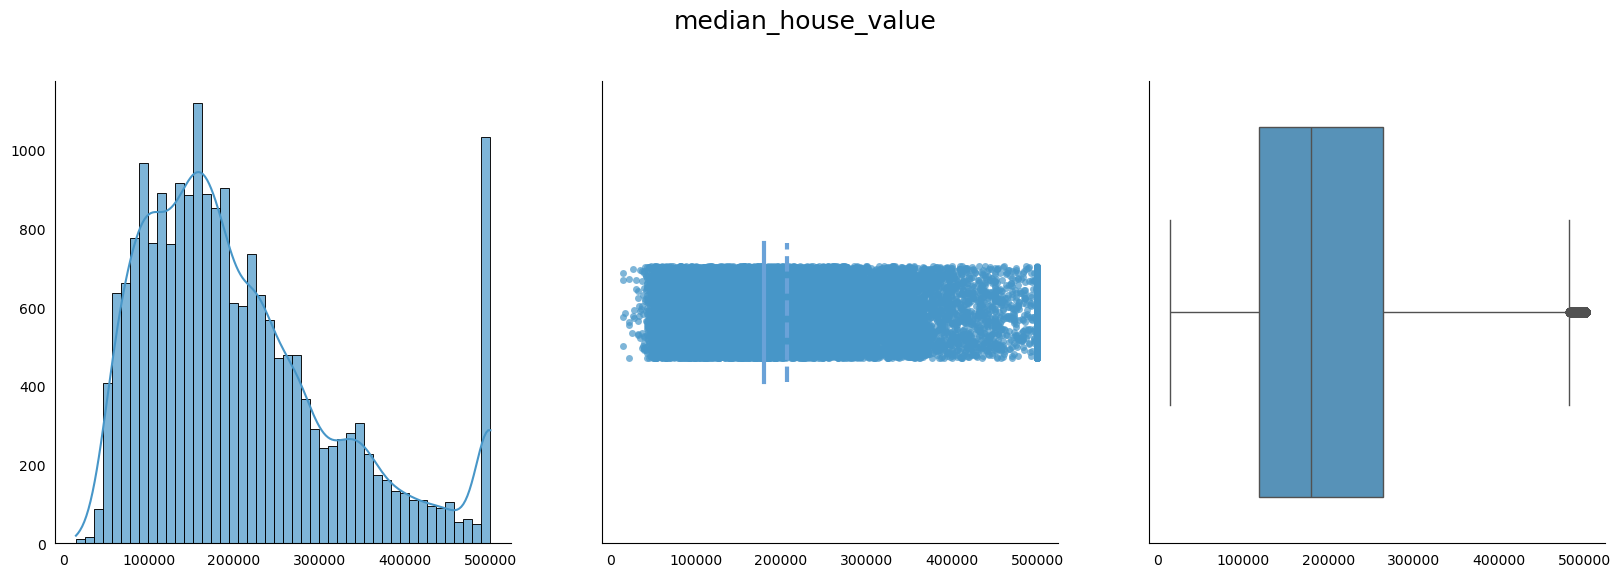

In [123]:
# Set the color palette
sns.set_palette(sns.color_palette(["#4796C8"]))

for i in df.select_dtypes('number').columns:
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    # Plots
    sns.histplot(data=df[i], ax=ax[0], kde=True, alpha=0.7)
    sns.stripplot(x=df[i], ax=ax[1], alpha=0.7)
    sns.boxplot(x=df[i], ax=ax[2])

    # Stripplot median and mean line
    median = df[i].median()
    mean = df[i].mean()
    ax[1].axvline(x=median, color='#6AA2D8', linestyle='-', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)  # median
    ax[1].axvline(x=mean, color='#6AA2D8', linestyle='--', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)   # mean

    # Title entire figure
    fig.suptitle(i, fontsize=18, y=1)

    # Hide ticks while keeping labels
    ax[0].tick_params(bottom=False)
    ax[1].tick_params(bottom=False)
    ax[2].tick_params(bottom=False)
    ax[0].tick_params(left=False)
    ax[1].tick_params(left=False)
    ax[2].tick_params(left=False)

    # Hide x and y labels
    ax[0].set(xlabel=None, ylabel=None)
    ax[1].set(xlabel=None, ylabel=None)
    ax[2].set(xlabel=None, ylabel=None)

    sns.despine()

#### <a id='toc1_2_1_1_'></a>[Goodness-of-fit test for housing_median_age](#toc0_)
This feature initially appeared somewhat normal; however, a goodness-of-fit test resulted in the rejection of the null hypothesis.

In [124]:
from scipy.stats import shapiro

housing_median_age = df['housing_median_age']

# Perform the Shapiro-Wilk test
stat, p = shapiro(housing_median_age)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

Statistics=0.978, p=0.000
The data is not normally distributed (reject H0).


c:\Users\gusta\anaconda3\envs\general-ds\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


---
### <a id='toc1_2_2_'></a>[Handling Missing Values](#toc0_)

`total_bedrooms` presents 1% missing data. Initially, we remove these NaNs for clarity. 
  
For later modeling, we use median imputation to address the righ-scew distribution, where the mean, inflated by a long tail towards higher values, exceeds the median. This method ensures a more stable baseline for analysis.

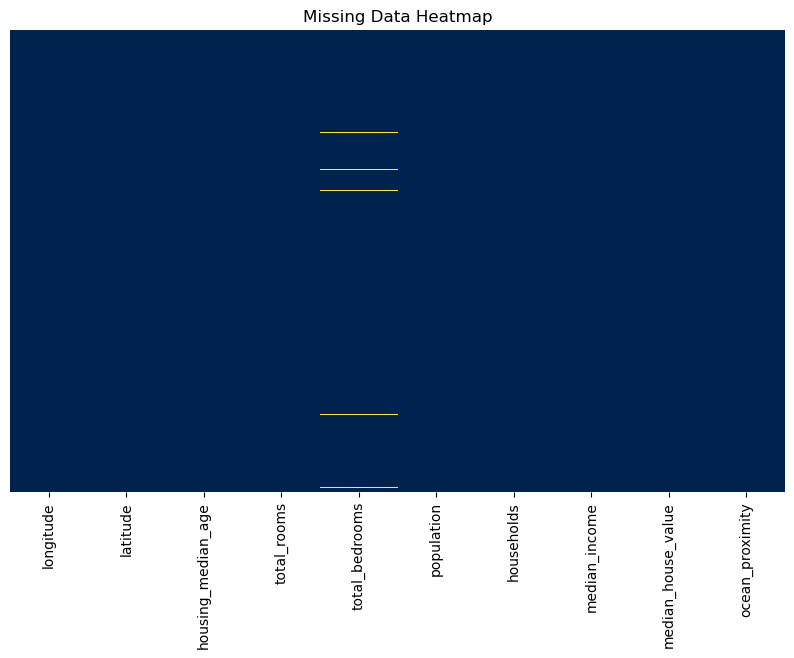

In [125]:
# Heatmap to visualize the missing data
missing = df.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

In [126]:
# Missing NaN
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [127]:
# Percentage NaN
df.isnull().mean() * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [128]:
# Drop missing values
df = df.dropna(subset=['total_bedrooms'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### <a id='toc1_2_3_'></a>[Feature Engineering](#toc0_)
We introduce three calculated features: "rooms_per_household," "population_per_household," and "bedrooms_per_room," crafted via basic arithmetic. While not used in subsequent modeling, such features are often pivotal for uncovering interaction terms that boost predictive accuracy. This approach can also enrich our dataset with interpretable dimensions, as demonstrated in this notebook's upcoming EDA.

In [129]:
# New feature: rooms_per_household
df.loc[:, 'rooms_per_household'] = df['total_rooms'] / df['households']

# New feature: population_per_household
df.loc[:, 'population_per_household'] = df['population'] / df['households']

# New feature: bedrooms_per_room
df.loc[:, 'bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

### <a id='toc1_2_4_'></a>[Managing Outliers](#toc0_)
Our dataset features exponential distributions, which naturally include larger values that might be considered outliers in symmetric distributions. We will not remove these, acknowledging their integral role in the data's structure.

However, in "rooms_per_household," we found outliers with values below 1 and exceptionally high values, deemed illogical. These rows will be excluded to maintain data interpretability.

In [130]:
# Four (4) outliers that we will drop
df['rooms_per_household'].sort_values()

5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: rooms_per_household, Length: 20433, dtype: float64

In [131]:
# Dropping the outliers
indices_to_drop = [5916, 8219, 1979, 1914]
df = df.drop(indices_to_drop)

<hr style="border:1px solid #4A90E2"> </hr>

## <a id='toc1_3_'></a>[EDA](#toc0_)
In this Exploratory Data Analysis, we'll delve into the data to better understand how various factors, such as income and location, influence house prices. By employing thoughtful visualizations and analyses, our goal is to identify patterns and provide insights into the data, which will hopefully inform our modeling efforts later on.

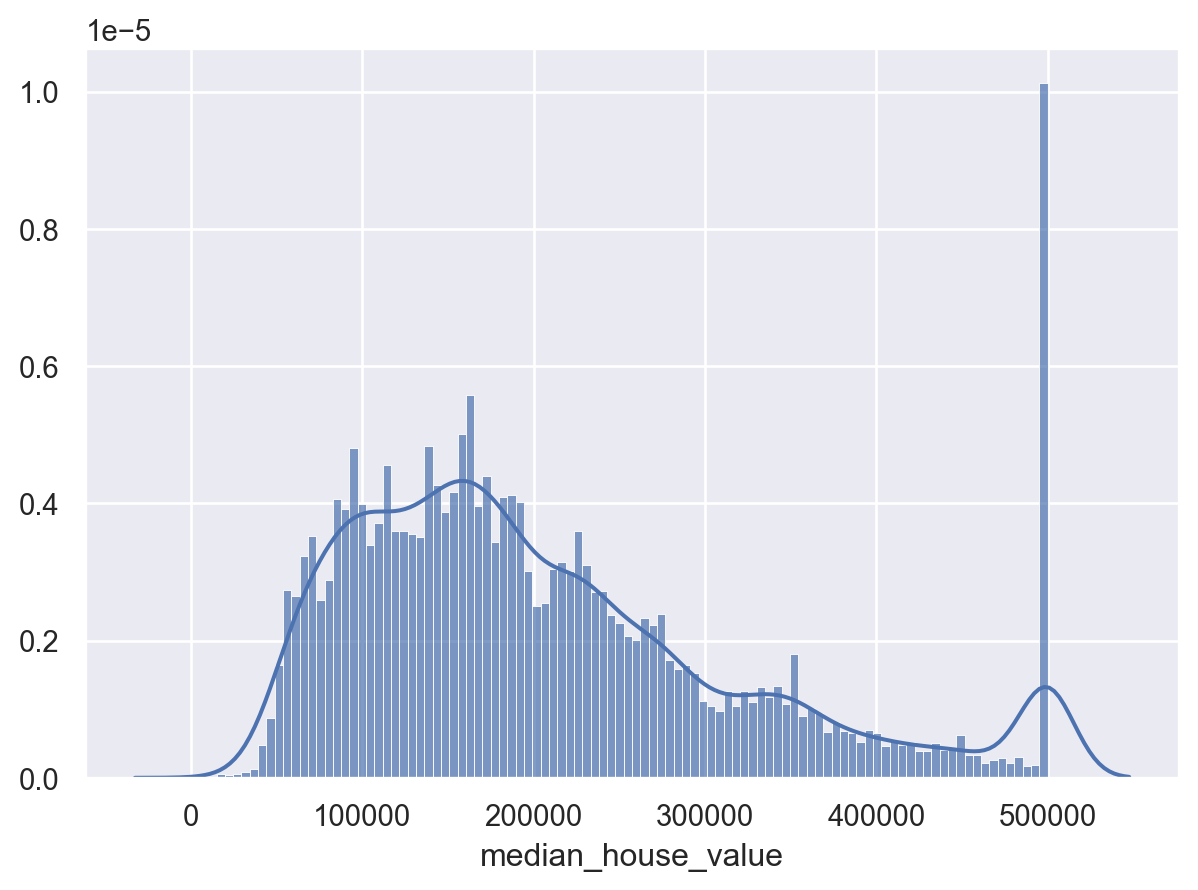

In [132]:
# Lib
import seaborn.objects as so

# Histplot w/ 100 bins
(so
 .Plot(df, x='median_house_value')
 .add(so.Bars(), so.Hist('density',bins=100))
 .add(so.Line(), so.KDE())
 )

### <a id='toc1_3_1_'></a>[Target Variable Correlations](#toc0_)
#### <a id='toc1_3_1_1_'></a>[Correlation Table](#toc0_)
Exploring key variables linked to "median_house_value" for upcoming modeling.

In [133]:
target_var = 'median_house_value'

# Correlation with "median_house_value"
(df
 .corr(numeric_only=True)[target_var]  # Calculate correlation with the target variable
 .drop(target_var)  # Drop the target variable from the series
 .sort_values(ascending=False)
 .to_frame()  # Convert to DataFrame for styling
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)  # Apply the color gradient
)


,median_house_value
median_income,0.688652
rooms_per_household,0.170930
total_rooms,0.133314
housing_median_age,0.106462
households,0.064978
total_bedrooms,0.049701
population_per_household,-0.023645
population,-0.025248
longitude,-0.045342
latitude,-0.144894


---
### <a id='toc1_3_2_'></a>['Median Income': A Principal Predictor](#toc0_)
#### <a id='toc1_3_2_1_'></a>[Exploring the Core Predictor Distribution](#toc0_)
Examining the distribution of "median_income," the variable with the highest correlation to "median_house_value".

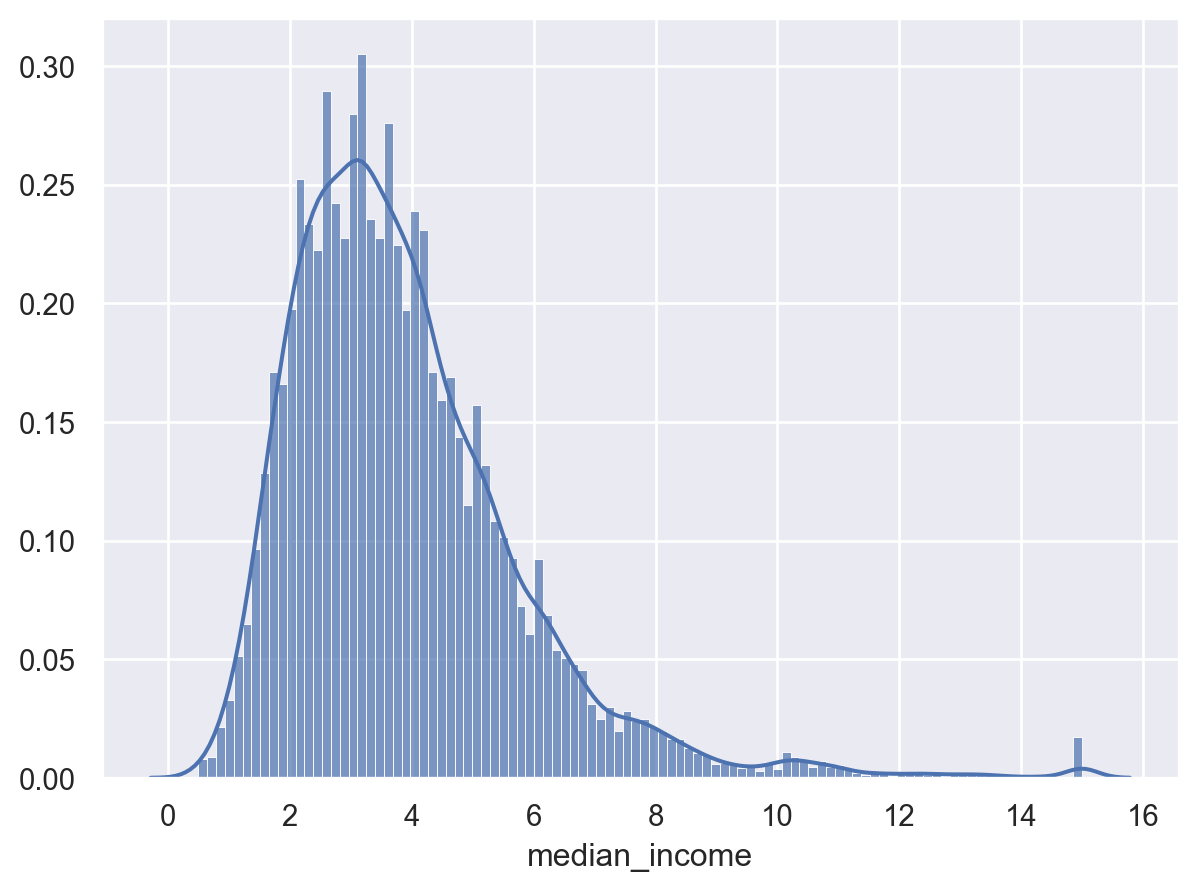

In [134]:
(so
 .Plot(df, x='median_income')
 .add(so.Bars(), so.Hist('density', bins=100))
 .add(so.Line(), so.KDE())
 )

---
#### <a id='toc1_3_2_2_'></a>[Visualizing Correlation: Income and House Value](#toc0_)
The scatter plot reveals a positive correlation between "median_income" and "median_house_value," showing that higher incomes tend to be associated with higher house prices. Observations cluster within specific ranges of income and house values, and a noticeable cap on house values indicates a dataset limitation, potentially leading to biased predictions. This limitation particularly affects extrapolation beyond the cap, where the model's ability to predict values outside the observed range is compromised, while also impacting the reliability of interpolation within the capped range by distorting the underlying data distribution.

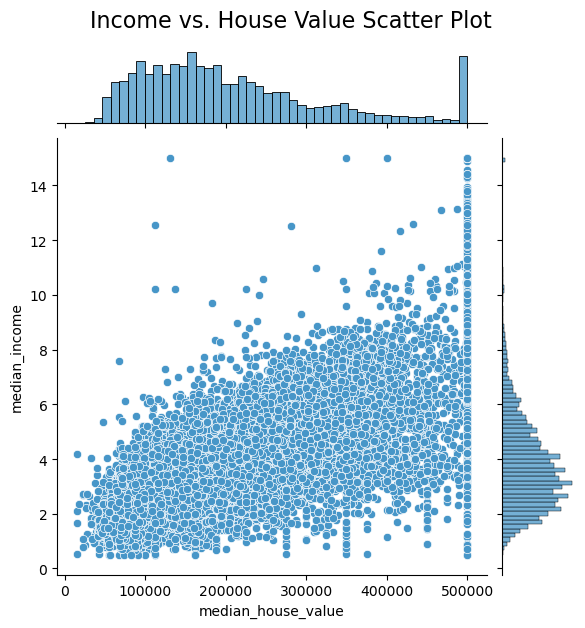

In [135]:
sns.jointplot(x='median_house_value', y='median_income', data=df, kind='scatter', space=0.2)
plt.suptitle('Income vs. House Value Scatter Plot', size=16, y=1.04)
plt.show()

---
#### <a id='toc1_3_2_3_'></a>[Density Insights: Contour Visualization](#toc0_)
The contour plot clearly delineates the concentration of data, revealing the density gradient from areas of highest to lowest density. This visualization offers insights into the core distribution zones that scatter plots may not readily provide.

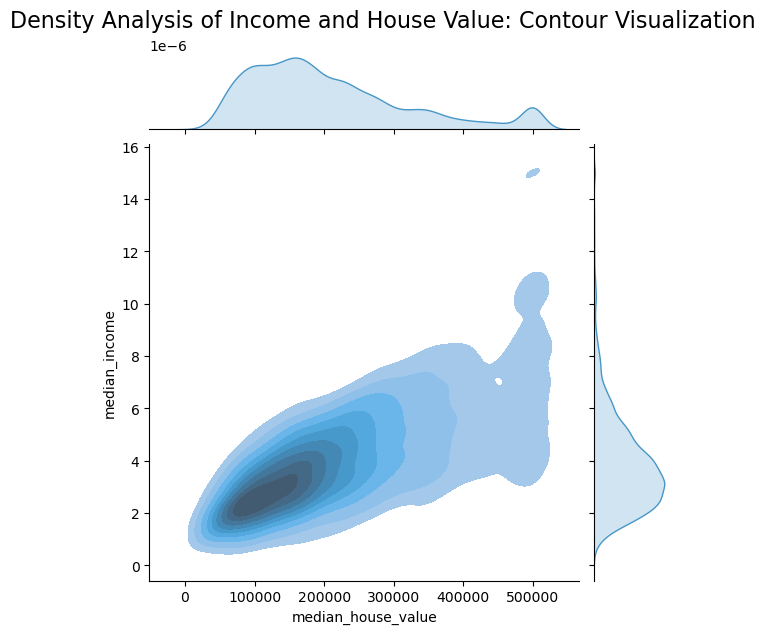

In [136]:
# Contour plot, conveys density and distribution of data
sns.jointplot(x='median_house_value', y='median_income', data=df, kind='kde', fill=True)  # cmap colors: 'viridis', 'plasma', 'inferno', 'magma'
plt.suptitle('Density Analysis of Income and House Value: Contour Visualization', size=16, y=1.05)
plt.show()

---
### <a id='toc1_3_3_'></a>[Feature Creation: Income Categories](#toc0_)
We've created a new categorical column, "income_cat," from "median_income" using quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]`, labeling them as `["Low", "Below_Average", "Above_Average", "High", "Very High"]`. Incorporating the 0.95 quantile to highlight top earners is insightful, enabling us to distinctly identify the top 5% of earners.

In [137]:
# Calculate quartiles including the 95th percentile for the "median_income" column
quartiles = [0, 0.25, 0.5, 0.75, 0.95, 1]
percentiles = df['median_income'].quantile(quartiles).values

# New categorical column "income_cat" based on the defined quartiles
df['income_cat'] = pd.cut(df['median_income'],
                          bins=percentiles,
                          labels=["Low", "Below_Average", "Above_Average", "High", "Very High"],
                          include_lowest=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,Above_Average


---
### <a id='toc1_3_4_'></a>[Income and Ocean Proximity](#toc0_)
#### <a id='toc1_3_4_1_'></a>[Income Levels and Coastal Proximity: A Visual Correlation](#toc0_)
This countplot reveals how income levels correlate with proximity to the ocean, specifically `<1H OCEAN`, indicating higher incomes are more common near the coast.

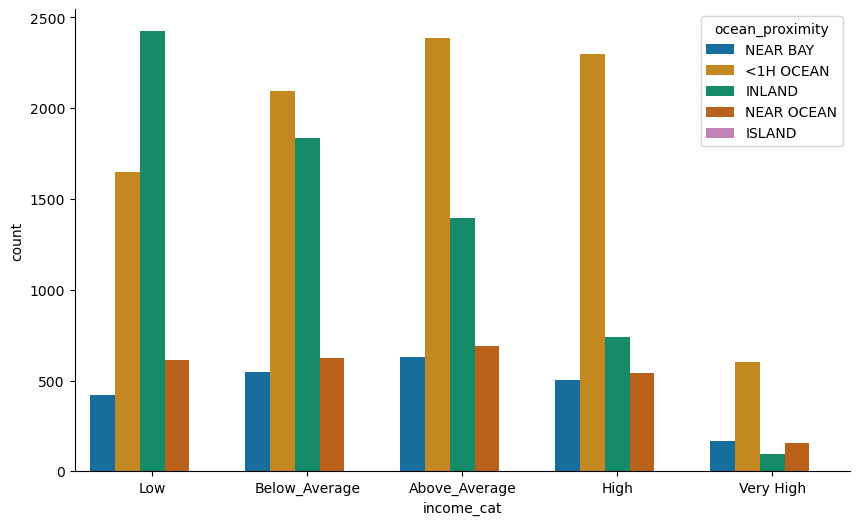

In [138]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income_cat', hue='ocean_proximity', data=df, palette='colorblind')
sns.despine()

---
#### <a id='toc1_3_4_2_'></a>[Variability and Value: Insights from Income and Proximity](#toc0_)
The two graphs illustrate the relationship between income levels, ocean proximity, and median house values (y-axis), confirming the correlation between income level and house value of a district. In the right graph, we observe distinct variability for "ISLAND," as highlighted by the longer confidence interval lines, indicating less confidence in the feature due to a limited number of data points. This sparsity could pose challenges in modeling, particularly because this category's scarcity in our test set may not provide the model with sufficient examples to ensure generalizability.

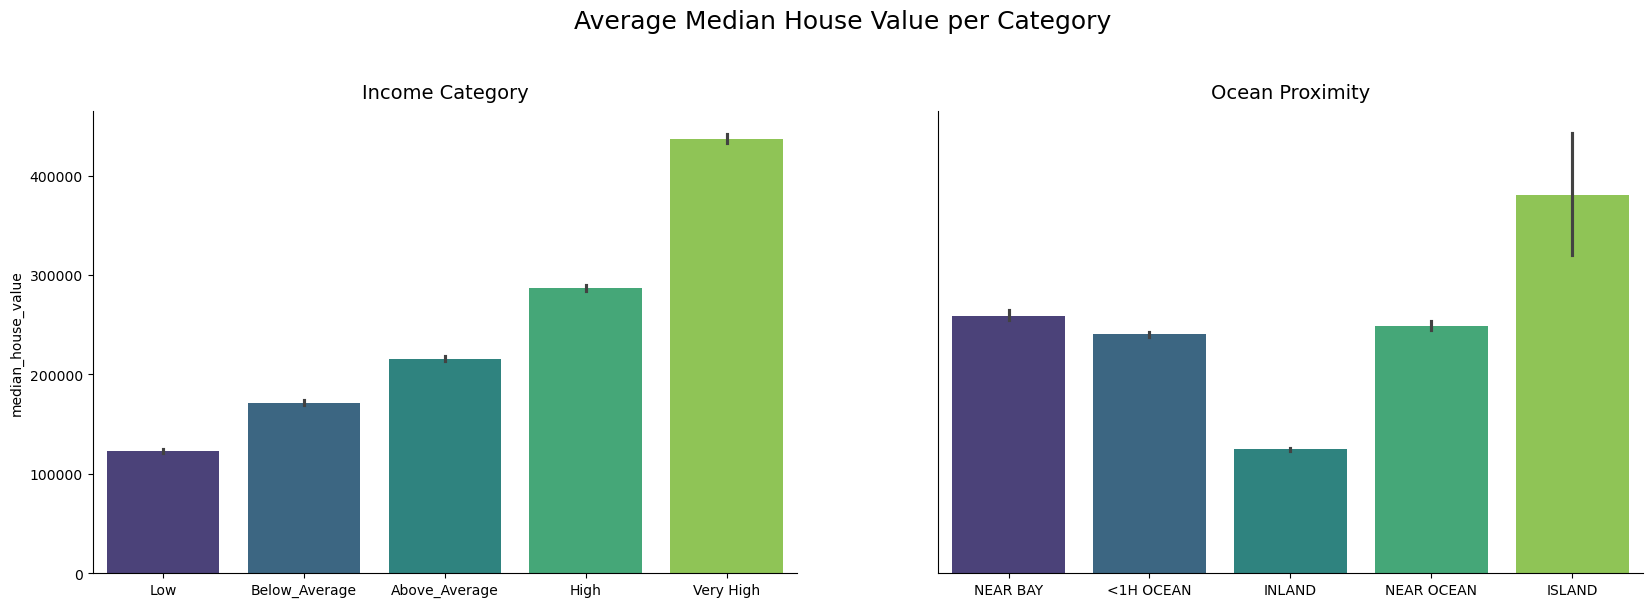

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plots
sns.barplot(data=df, x='income_cat', y='median_house_value', ax=ax[0], palette='viridis')
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', ax=ax[1], palette='viridis')

# Fig title
fig.suptitle("Average Median House Value per Category", size=18, y=1.05)

# Ax titles
ax[0].set_title("Income Category", size=14, y=1.01)
ax[1].set_title("Ocean Proximity", size=14, y=1.01)

# Tick and label style
ax[0].set(xlabel=None)
ax[1].set(xlabel=None)
ax[1].tick_params(left=False)

sns.despine()

In [140]:
df.loc[df['ocean_proximity'] == 'ISLAND', ['ocean_proximity', 'median_house_value']].sort_values(by='median_house_value')

,ocean_proximity,median_house_value
8318,ISLAND,287500.0
8316,ISLAND,300000.0
8315,ISLAND,414700.0
8314,ISLAND,450000.0
8317,ISLAND,450000.0


#### <a id='toc1_3_4_3_'></a>[Income and Ocean Proximity: Heatmap Analysis](#toc0_)
This visualization offers a compelling insight into how income_cat, our tailored feature, interacts with ocean_proximity to influence median_house_value. By excluding the "ISLAND" category for clarity, the heatmap vividly illustrates the nuanced relationship between varying income levels and their proximity to the ocean.

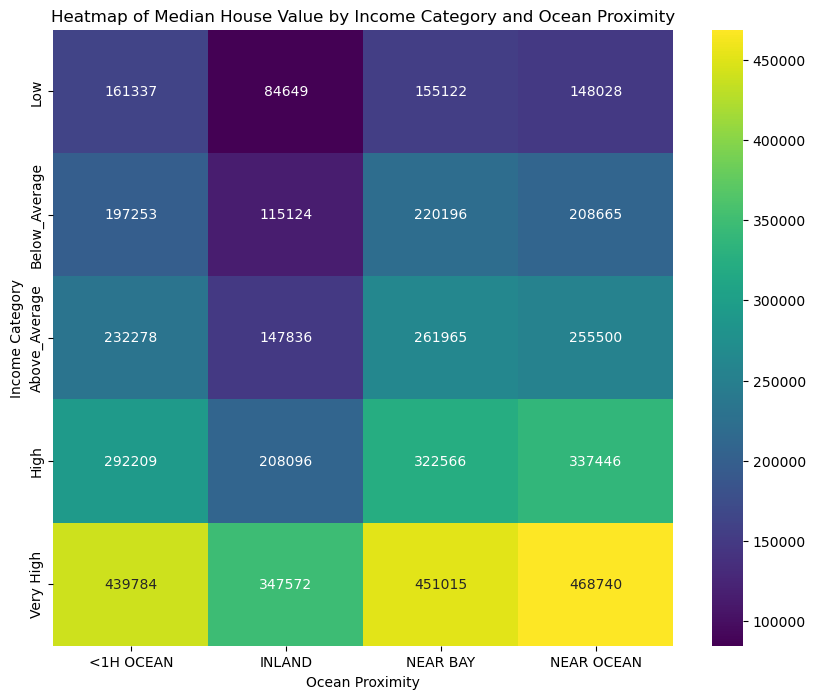

In [141]:
pivot_df = df.groupby(['income_cat', 'ocean_proximity'])['median_house_value'].mean().unstack().drop('ISLAND', axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap='viridis')
plt.title('Heatmap of Median House Value by Income Category and Ocean Proximity')
plt.ylabel('Income Category')
plt.xlabel('Ocean Proximity')
plt.show()

<hr style="border:1px solid #4A90E2"> </hr>

## <a id='toc1_4_'></a>[`OLS`: Analytical Primer to Inform Linear Modeling](#toc0_)

### <a id='toc1_4_1_'></a>[7 Classical Assumptions of OLS and Linear Regression](#toc0_)
As we embark on this analytical phase, it's crucial to recall the foundational assumptions underpinning OLS Linear Regression. The dataset's propensity for outliers, due to the right-scewed distributions, signals potential deviations from these assumptions. In the ensuing analysis, we aim to methodically assess each assumption, identifying and addressing any discrepancies to refine our approach.
1. **Linear Relationship Between Predictors and Outcome**: Independent variables linearly predict the dependent variable.
2. **Zero Mean Error Across Observations**: Errors have a mean of zero across observations.
3. **No Correlation Between Predictors and Errors**: Independent variables uncorrelated with errors.
4. **No Autocorrelation (Independence of Errors)**: Observations' errors are not correlated with each other.
5. **Homoscedasticity (Constant Error Variance):**: Errors exhibit constant variance (homoscedasticity).
6. **No Perfect Multicollinearity**: Independent variables are not perfectly linearly related.
7. **Normal Distribution of Error Terms**: Errors are normally distributed (optional but preferred for hypothesis testing).

See the full explanation [here](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/).

### <a id='toc1_4_2_'></a>[Helper Functions](#toc0_)

In [142]:
# Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# VIF Function
def calculate_vif(X):
    """Calculate VIF for each feature in a DataFrame"""
    return pd.DataFrame(
        {'feature': X.columns,
             'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        }).sort_values(by='VIF', ascending=False)

def train_ols_model(input_data, target_variable):
    """
    Perform Ordinary Least Squares (OLS) regression and return the fitted model object.
    """
    # Adding a constant term to the independent variables
    X = sm.add_constant(input_data)

    # Fitting the OLS model
    model = sm.OLS(target_variable, X)
    ols_model = model.fit()

    # Returning the model
    return ols_model

def split_dataset(df, target_var, train_size=0.7, random_state=42):
    """
    Splits the dataframe into training and testing sets based on the specified target variable.
    
    Parameters:
    - df: pandas DataFrame, the dataset to be split.
    - target_var: str, the name of the target variable column.
    
    Returns:
    - X_train: Training feature dataset.
    - X_test: Testing feature dataset.
    - y_train: Training target variable.
    - y_test: Testing target variable.
    """
    X = df.drop(target_var, axis=1)
    y = df[target_var]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

### <a id='toc1_4_3_'></a>[Dummy Encoding](#toc0_)
To enable regression analysis, we'll convert the categorical variable 'ocean_proximity' into numerical format through dummy encoding, making it compatible with our model.

In [143]:
# Reload dataset after dropping rows; avoid multicollinearity from rooms_per_household, population_per_household and bedrooms_per_room.
# This also removes 'income_cat', which is highly collinear and has fulfilled its EDA purpose.
df = pd.read_csv("housing.csv")

# Removing 'total_bedrooms' missing values, comprising 1% of the dataset.
df = df.dropna(subset=['total_bedrooms'])

# Create dummy variables for 'ocean_proximity'
ocean_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean', dtype=int)

# Concatenate df with dummies
df = pd.concat([df, ocean_dummies], axis=1)

# Drop superfluous cat column
df.drop(columns=['ocean_proximity'], inplace=True)

### <a id='toc1_4_4_'></a>[Data Split: Test/Train](#toc0_)

In [144]:
target_var = 'median_house_value'
X_train, X_test, y_train, y_test = split_dataset(df, target_var)
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN'],
      dtype='object')

### <a id='toc1_4_5_'></a>[Round 1 Analysis](#toc0_)
The consistently low p-values indicate the significance of all features. However, a warning for multicollinearity has been flagged, necessitating further investigation.

In [145]:
X_train_ols = X_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN']]
results = train_ols_model(X_train_ols, y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2145.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:06:06   Log-Likelihood:            -1.7965e+05
No. Observations:               14303   AIC:                         3.593e+05
Df Residuals:                   14290   BIC:                         3.594e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.836e+06   8.83e+04    -20.782      0.000   -2.01e+06   -1.66e+06
longitude          -2.639e+04   1221.707    -21.601      0.000   -2.88e+04    -2.4e+04
latitude           -2.512e+04   1204.495    -20.852      0.000   -2.75e+04   -2.28e+04
housing_median_age  1103.7150     52.786     20.909      0.000    1000.247    1207.183
total_rooms           -6.5185      0.949     -6.868      0.000      -8.379      -4.658
total_bedrooms       105.6840      8.185     12.912      0.000      89.640     121.728
population           -35.2604      1.241    -28.404      0.000     -37.694     -32.827
households            38.7288      8.789      4.407      0.000      21.502      55.956
median_income       3.928e+04    403.625     97.324      0.000    3.85e+04    4.01e+04
ocean_<1H OCEAN    -3.974e+05   1.93e+04    -20.577      0.000   -4.35e+05    -3.6e+05
ocean_INLAND       -4.373e+05   1.82e+04    -24.021      0.000   -4.73e+05   -4.02e+05
ocean_ISLAND       -2.041e+05   4.46e+04     -4.575      0.000   -2.92e+05   -1.17e+05
ocean_NEAR BAY     -4.029e+05   1.98e+04    -20.324      0.000   -4.42e+05   -3.64e+05
ocean_NEAR OCEAN   -3.941e+05   1.97e+04    -19.992      0.000   -4.33e+05   -3.55e+05
==============================================================================
Omnibus:                     3628.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14271.367
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                       7.247   Cond. No.                     5.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [146]:
calculate_vif(X_train_ols)

,feature,VIF
8,ocean_<1H OCEAN,14887.777212
9,ocean_INLAND,10212.781827
12,ocean_NEAR OCEAN,4318.171226
11,ocean_NEAR BAY,3814.863388
4,total_bedrooms,35.563718
6,households,33.617752
1,latitude,19.882770
0,longitude,17.991314
3,total_rooms,12.758394
5,population,6.081233


### <a id='toc1_4_6_'></a>[ Round 2 Analysis](#toc0_)
In refining our model to address multicollinearity, we opted to drop longitude and latitude in favor of 'ocean_' categories, based on a technical comparison:

- **Coefficient Magnitude**: 'ocean_' categories have larger coefficients, indicating a stronger effect on housing prices than the more subtle changes captured by longitude and latitude.

- **Standard Errors (Std Err)**: While 'ocean_' categories exhibit higher standard errors, indicating more variability in their coefficient estimates, the magnitude of their impact justifies their inclusion over geographical coordinates with lower variability but less overall significance.

- **T-values**: The significant t-values for 'ocean_' categories, despite their larger standard errors, underscore their robust predictive power. In contrast, longitude and latitude, while also significant, offer less distinctive insights into housing price variations.

This technical evaluation emphasizes the strategic decision to prioritize 'ocean_' categories, leveraging their distinct contribution to model accuracy and interpretability.

In [147]:
X_train_ols = X_train[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN']]
results = train_ols_model(X_train_ols, y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2447.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:06:06   Log-Likelihood:            -1.7988e+05
No. Observations:               14303   AIC:                         3.598e+05
Df Residuals:                   14292   BIC:                         3.599e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.767e+04   8607.757      5.538      0.000    3.08e+04    6.45e+04
housing_median_age  1213.5829     53.370     22.739      0.000    1108.971    1318.195
total_rooms           -7.7171      0.960     -8.035      0.000      -9.600      -5.835
total_bedrooms        87.8832      8.246     10.658      0.000      71.721     104.046
population           -34.2708      1.256    -27.294      0.000     -36.732     -31.810
households            63.8376      8.831      7.229      0.000      46.527      81.148
median_income       4.043e+04    406.211     99.531      0.000    3.96e+04    4.12e+04
ocean_<1H OCEAN    -2.206e+04   8326.402     -2.650      0.008   -3.84e+04   -5741.744
ocean_INLAND       -9.085e+04   8323.756    -10.914      0.000   -1.07e+05   -7.45e+04
ocean_ISLAND        1.902e+05   4.13e+04      4.601      0.000    1.09e+05    2.71e+05
ocean_NEAR BAY     -1.964e+04   8430.650     -2.330      0.020   -3.62e+04   -3118.742
ocean_NEAR OCEAN   -9970.4125   8393.887     -1.188      0.235   -2.64e+04    6482.697
==============================================================================
Omnibus:                     3520.068   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12962.185
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       6.999   Cond. No.                     4.69e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
calculate_vif(X_train_ols)

,feature,VIF
2,total_bedrooms,34.953305
4,households,32.875165
1,total_rooms,12.653726
6,ocean_<1H OCEAN,11.283937
3,population,6.025466
7,ocean_INLAND,5.674902
9,ocean_NEAR BAY,4.133737
10,ocean_NEAR OCEAN,3.757344
5,median_income,1.740014
0,housing_median_age,1.314451


In [149]:
from sklearn.metrics import r2_score

# Fitting model on test data and display test score
X_test_ols = X_test[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN']]
X_test_ols = sm.add_constant(X_test_ols)
r2_score(y_test, results.predict(X_test_ols))

0.6411382926853638

### <a id='toc1_4_7_'></a>[`OLS` Analysis Conclusion](#toc0_)

Our `OLS` analysis has led to several key insights and outcomes that inform our next steps in predictive modeling:

- **Statistical Significance of Predictors**: All predictors in the model are statistically significant, indicating reliable relationships between these features and the target variable.

- **Reduction of Multicollinearity**:
  - Successfully identified and removed features that caused multicollinearity.
  - This enhancement in model interpretability has also led to a substantial improvement in the F-statistic.

- **Technical Evaluation of Geographical vs. Categorical Variables**:
  - A focused comparison between geographical (longitude and latitude) and categorical ('ocean_proximity') variables highlighted the significant impact of the latter on median house values. Despite the precision in estimates indicated by lower standard errors for longitude and latitude, the 'ocean_' variables, with their substantial coefficients and significant t-values, were prioritized due to their unique contribution to explaining housing price variations. This decision was supported by the need to address multicollinearity and enhance model interpretability, demonstrating the importance of selecting predictors that offer distinct and substantial insights into the dependent variable.

- **Implications of the Improved F-statistic**:
  - Indicates a strong relationship between the model's predictors and the target variable.
  - Confirms the collective predictive power of the included features is robust, negating the need for further feature selection.

- **Model Generalization**:
  - The model demonstrates no overfitting, as evidenced by the test score surpassing the train score.
  - Suggests that the model is likely to generalize well to unseen data, making regularization unnecessary.

---
### <a id='toc1_4_8_'></a>[Residual Analysis](#toc0_)
Given the modest predictive power observed so far, i.e, a $R^2$ of only 63%, conducting a residual analysis is crucial for regression modeling. This process has revealed several insights regarding the distribution of errors:

1. **Histogram of Residuals**: The histogram suggests that the residuals are not perfectly normally distributed, as indicated by the visible skewness. The ideal normal distribution would have a more symmetrical bell shape.

2. **Q-Q Plot**: The Quantile-Quantile (Q-Q) plot further supports the observation from the histogram. In a perfectly normal distribution, the points should closely follow the 45-degree line. Deviations from this line suggest deviations from normality.

3. **Statistical Tests**:
   - **Shapiro-Wilk Test**: The p-value is 0.0, indicating the rejection of the null hypothesis of normality. This test is sensitive to deviations from a normal distribution, particularly with large sample sizes.
   - **Kolmogorov-Smirnov Test**: With a p-value of 0.0, this test also rejects the hypothesis of normality. The statistic value suggests a significant difference from a normal distribution.
   - **Anderson-Darling Test**: The statistic value is much higher than the critical values for all significance levels, leading to the conclusion that the residuals do not follow a normal distribution.

**Residuals vs. Fitted Values Plot**: Ideally, this plot should show no discernable pattern, and the residuals should be randomly scattered around the horizontal line (y=0). The presence of a pattern or structure in this plot can indicate issues such as non-linearity, heteroscedasticity, or outliers. Lastly, the data points' clustering around the dashed line suggests the zero mean error assumption holds.

The analysis reveals that the residuals from the OLS model diverge from normal distribution. This divergence could potentially compromise the model's underlying assumptions, especially those pertinent to inferential analysis, which relies on normally distributed residuals. To address this, implementing data transformations or exploring alternative modeling methods may be advisable to adhere to the prerequisites of linear regression.

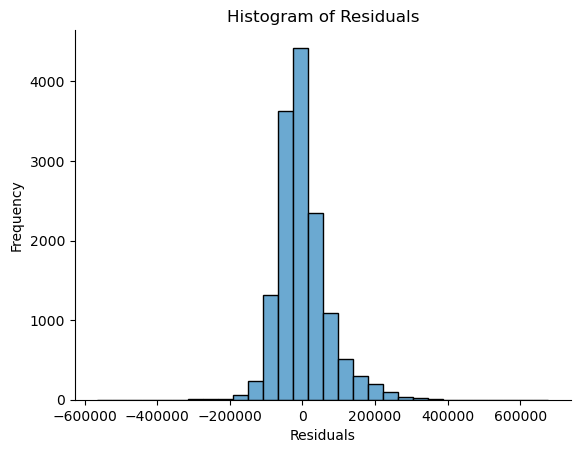

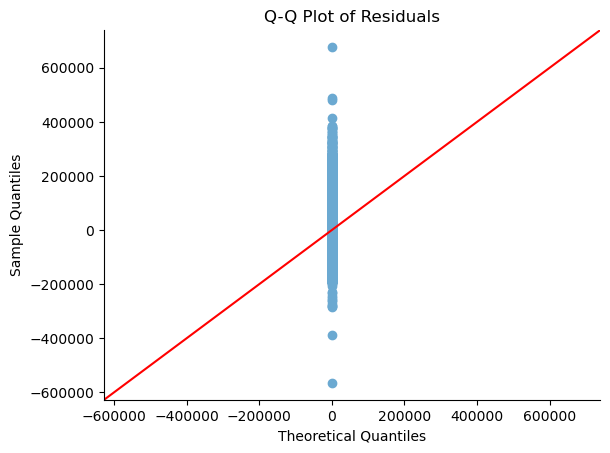

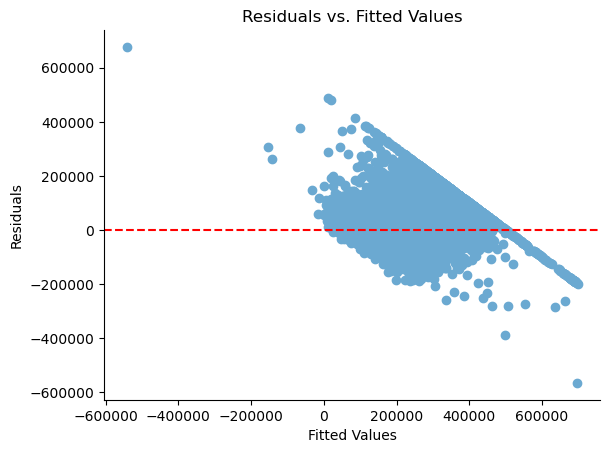

Shapiro-Wilk Test: ShapiroResult(statistic=0.9239371418952942, pvalue=0.0) 

Kolmogorov-Smirnov Test: KstestResult(statistic=0.5849821715723974, pvalue=0.0, statistic_location=-16.375973382382654, statistic_sign=1)
Anderson-Darling Test: AndersonResult(statistic=263.91106680883604, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.4374520839831716e-09, scale=70082.82773123885)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


c:\Users\gusta\anaconda3\envs\general-ds\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [150]:
from scipy import stats

# Set the color palette
sns.set_palette(sns.color_palette(["#6BA9D1"]))

# 'results' being the fitted OLS model from statsmodels
residuals = results.resid

# Visual Inspection
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
sns.despine()
plt.show()

sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
sns.despine()
plt.show()

# Residuals vs. Fitted Values Plot
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

# Statistical Tests
print("Shapiro-Wilk Test:", stats.shapiro(residuals), "\n")
print("Kolmogorov-Smirnov Test:", stats.kstest(residuals, 'norm'))
print("Anderson-Darling Test:", stats.anderson(residuals, dist='norm'))


#### <a id='toc1_4_8_1_'></a>[Residual Analysis Summary](#toc0_)

Our residual analysis indicates deviations from key OLS assumptions, notably in the normality of errors and constant variance. These deviations, revealed through statistical tests and visual plots, suggest our model's residuals are skewed and potentially heteroscedastic, impacting hypothesis testing and model reliability.

To address these issues:
- **Data Transformation** (e.g., log or square root) can help normalize residuals.
- **Adding Non-Linearity** through polynomial terms improves model fit.
- **Robust Methods** like quantile regression or regularization adjust for outliers and stabilize estimates.
- **Weighted Least Squares** or similar techniques can correct heteroscedasticity.

Our residual analysis has identified critical deviations from OLS assumptions, particularly concerning error normality and variance consistency. These insights will guide adjustments in our modeling strategy, emphasizing the necessity of iterative refinement to align our predictive model more closely with the data's inherent complexities.


#### <a id='toc1_4_8_2_'></a>[Next Steps: Linear Regression with `scikit-learn`](#toc0_)

Transitioning from the analytical depth of `OLS` to a more streamlined approach, we will next explore building linear regression models using `scikit-learn`. This phase will focus on:

- **Quick and Efficient Modeling**: Employing `scikit-learn` for a faster modeling process that prioritizes speed and efficiency over the detailed statistical analysis provided by `OLS`.

- **Practical Application**: Leveraging `scikit-learn`'s linear regression to seamlessly apply our findings from the `OLS` analysis to predictive modeling, aiming for practical, actionable results.

This approach will allow us to balance the analytical strengths of `OLS` with the practical, application-focused capabilities of `scikit-learn`, moving from statistical exploration to effective predictive modeling.

---
## <a id='toc1_5_'></a>[Linear Regression](#toc0_)

### <a id='toc1_5_1_'></a>[Reload Data and Train/Test Split](#toc0_)

In [151]:
# Reload the dataset
df = pd.read_csv("housing.csv")

# Missing values will be left in for demonstrating imputing in the pipeline
# df = df.dropna(subset=['total_bedrooms'])

# Dropping features causing collinearity with ocean_proximity
df.drop(columns=['latitude', 'longitude'], inplace=True)

# Train/Test Split
X_train, X_test, y_train, y_test = split_dataset(df, target_var)

### <a id='toc1_5_2_'></a>[Building and Training Our Model](#toc0_)

We're now leveraging the `sklearn.linear_model.LinearRegression` library's pipeline for a streamlined modeling process. Key advantages include:

- **Automated Dummy Variable Creation**: The `OneHotEncoder` handles categorical data by automatically creating dummy variables. This eliminates the manual effort of creating dummies, concatenating, and dropping columns in the dataframe.
- **Direct Imputation in Pipeline**: The `SimpleImputer` allows us to impute missing values directly within the pipeline. Considering the 'total_bedrooms' feature, which contains a few hundred NaNs, we can fill in these missing values without losing the potential predictive power of other features in those rows. Importantly, to prevent data leakage, it's crucial to impute missing values as part of the pipeline **after** splitting the data. This approach prevents leakage because it ensures the imputation model is fitted only on the training data, avoiding any inadvertent influence from the test set's distribution or values.
- **Selective Preprocessing with Column Selectors**: Automated selectors ensure that appropriate preprocessing steps are applied to numerical and categorical data, streamlining the data preparation phase.
- **No Need for Manual Constant Addition**: Unlike the OLS model, where adding a constant is a necessary step for intercept calculation, `LinearRegression` within a pipeline manages this automatically.

This streamlined approach not only simplifies the model building and training process but also enhances model robustness by ensuring that preprocessing steps are correctly applied and validated.

#### <a id='toc1_5_2_1_'></a>[Regular Linear Regression](#toc0_)
In this initial Linear Regression approach, we applied StandardScaler for continuous variables and OneHotEncoding for categorical variables, resulting in modest results. Our prior distribution- and residual analysis revealed significant challenges like non-normal error distributions, non-random residuals, and right-skewed distributions with extended tails. These insights underscore the need for refining our modeling approach to improve accuracy and tackle the identified distributional challenges, prompting further experimentation in subsequent steps.

In [152]:
# Libraries
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression

# Only 'total_bedrooms' has NaNs; impute with median due to exponential distribution
num_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(drop='if_binary'))

# Lists with column names by datatype
num_features = make_column_selector(dtype_include='number')
cat_features = make_column_selector(dtype_include=object)

# Make transformer
preprocessor = make_column_transformer((num_transformer, num_features),
                                       (cat_transformer, cat_features))

# Instantiate model and pipeline
reg_model = LinearRegression()
pipe = make_pipeline(preprocessor, reg_model)

# Train the model
pipe.fit(X_train, y_train)

# Calculate R-squared score on training data and print
print("R^2 score on training data:", pipe.score(X_train, y_train))

# Calculate R-squared score on test data and print
print("R^2 score on test data:", pipe.score(X_test, y_test))

R^2 score on training data: 0.6352397570332144
R^2 score on test data: 0.62876788853378


#### <a id='toc1_5_2_2_'></a>[Polynomial Transformation](#toc0_)
By incorporating polynomial interaction terms prior to scaling, we observe a nuanced improvement in test performance, albeit at the expense of increased model complexity, suggesting a tendency towards overfitting. This indicates progress, yet underscores the need for further model optimization.

In [153]:
# Lib
from sklearn.preprocessing import PolynomialFeatures

# Define PolynomialFeatures transformer for creating polynomial features
poly_transformer = PolynomialFeatures(degree=2)

# Update num_transformer to include PolynomialFeatures
# Note: PolynomialFeatures should come after imputing and before scaling
num_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    poly_transformer,
    StandardScaler())

# Make transformer
preprocessor = make_column_transformer((num_transformer, num_features),
                                       (cat_transformer, cat_features))

# Create a pipeline with preprocessing and the model
pipe = make_pipeline(preprocessor, reg_model)

# Train the model
pipe.fit(X_train, y_train)

# Calculate R-squared score on training data and print
print("R^2 score on training data:", pipe.score(X_train, y_train))

# Calculate R-squared score on test data and print
print("R^2 score on test data:", pipe.score(X_test, y_test))

R^2 score on training data: 0.6737578185038791
R^2 score on test data: 0.6339976274677848


#### <a id='toc1_5_2_3_'></a>[Ridge Regularization and Polynomial Transformation](#toc0_)
Acknowledging the enhanced performance through polynomial feature inclusion, our next step tackles the subsequent overfitting. By introducing Ridge regularization, we aim to infuse the model with bias, thus curbing variance. The result is a notable reduction in overfitting alongside improved model generalization, as evidenced by a significant uptick in test performance.

In [154]:
# Lib
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Instantiate the Ridge regression model as the estimator
ridge_model = Ridge()

# Create a pipeline with preprocessing and the model
pipe = make_pipeline(preprocessor, ridge_model)

# Define the grid of parameters to search over
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100, 177, 178, 179, 180]  # Ridge regularization strength
}

# Set up the GridSearchCV to search for the best regularization strength
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (R^2):", grid_search.best_score_, '\n')

# Optionally, use the best model to make predictions
# y_pred = grid_search.predict(X_test)

# Calculate R-squared score on training data and print
print("R^2 score on training data:", grid_search.score(X_train, y_train))

# Calculate R-squared score on test data and print
print("R^2 score on test data:", grid_search.score(X_test, y_test))

Best parameters: {'ridge__alpha': 178}
Best cross-validation score (R^2): 0.659972386106953 

R^2 score on training data: 0.6663748683039543
R^2 score on test data: 0.6527891551747211


#### <a id='toc1_5_2_4_'></a>[Lasso Regularization, Polynomial Transformation, and Log Transformation](#toc0_)
Given the long tails characteristic of our right-skewed data, we applied log transformation to mitigate the influence of extreme values, addressing outliers effectively. This step, combined with a shift from ridge to lasso regularization, enabled a more focused reduction of less critical variables, enhancing model performance without compromising the model's balance between bias and variance. Remarkably, despite initial challenges, this approach culminated in a model that not only fits within the linear regression framework but also achieves an R-squared score on test data approaching 70%, illustrating significant progress towards a viable predictive tool

In [155]:
# Lib
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
import warnings
from sklearn.exceptions import ConvergenceWarning

# Temporarily suppress convergence warnings (re-enable: "default")
warnings.simplefilter("ignore", ConvergenceWarning)

# Define a function transformer for applying log transformation
log_transform = FunctionTransformer(np.log1p)

# Transformer for exponential features with log transformation, including imputation and scaling
# Note: Here, imputation is applied before log transformation and scaling
log_transformer = make_pipeline(
    SimpleImputer(strategy='median'),  # Impute before log transform
    log_transform,
    poly_transformer,
    StandardScaler()
)

# Column selectors
num_features = ['housing_median_age']
cat_features = ['ocean_proximity']
log_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Compose preprocessing using make_column_transformer
preprocessor = make_column_transformer(
    (num_transformer, num_features),
    (cat_transformer, cat_features),
    (log_transformer, log_features),
    remainder='drop'
)

# Instantiate pipeline with the Lasso regression model as the estimator
lasso_model = Lasso(max_iter=10000)
pipe = make_pipeline(preprocessor, lasso_model)

# Define the grid of parameters to search over
param_grid = {
    'lasso__alpha': [1, 1.25, 1.5]  # Lasso regularization strength
}

# Set up the GridSearchCV to search for the best regularization strength
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (R^2):", grid_search.best_score_, '\n')

# Calculate R-squared score on training data and print
print("R^2 score on training data:", grid_search.score(X_train, y_train))

# Calculate R-squared score on test data and print
print("R^2 score on test data:", grid_search.score(X_test, y_test))

Best parameters: {'lasso__alpha': 1.25}
Best cross-validation score (R^2): 0.6861350782030897 

R^2 score on training data: 0.689120289953231
R^2 score on test data: 0.6729663610248414


---
#### <a id='toc1_5_2_5_'></a>[Analyzing Actual vs Predicted Values](#toc0_)
The scatter and hexbin plots, while suggesting a possible divergence between predicted and actual values, actually align with the data's trend upon closer analysis. The evident clustering at lower income brackets reflects the data's right-skewed distribution, which is common in housing markets. This skewness presents a challenge to linear regression, which assumes normally distributed errors. Such constraints highlight the necessity for a thorough evaluation of the data characteristics when appraising a model's accuracy and choosing an apt modeling method.

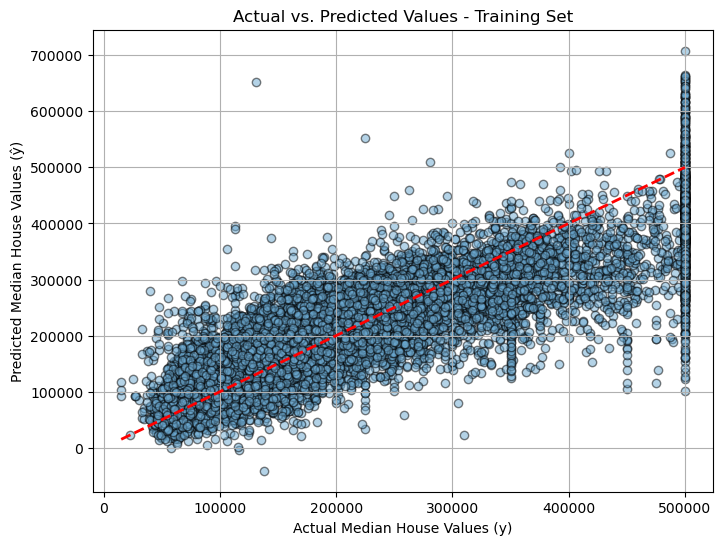

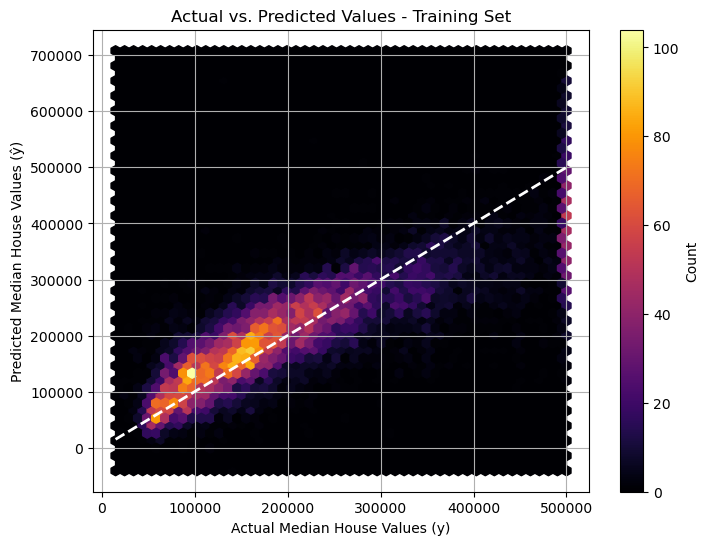

In [156]:
# Generate predictions for the training set
y_train_pred = grid_search.predict(X_train)

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, edgecolor='k')
plt.title('Actual vs. Predicted Values - Training Set')
plt.xlabel('Actual Median House Values (y)')
plt.ylabel('Predicted Median House Values (ŷ)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
plt.grid(True)
plt.show()

# Hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(y_train, y_train_pred, gridsize=50, cmap='inferno', extent=(np.min(y_train), np.max(y_train), np.min(y_train_pred), np.max(y_train_pred)))
plt.colorbar(label='Count')
plt.title('Actual vs. Predicted Values - Training Set')
plt.xlabel('Actual Median House Values (y)')
plt.ylabel('Predicted Median House Values (ŷ)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'w--', lw=2)  # White line for perfect predictions
plt.grid(True)
plt.show()


---
#### <a id='toc1_5_2_6_'></a>[Impact of Dropping vs. Imputing 'Total Bedrooms' (Regular Linear Regression)](#toc0_)
Our journey through data handling illustrated imputation as a viable method, emphasizing the necessity of exploring various techniques beyond mere deletion to enhance predictive power. Yet, simplicity often leads the way; dropping merely 1% of rows with missing 'total_bedrooms' values, rather than imputing, maximized our initial model's accuracy:
- Dropping NaNs increased our test score to 0.641.
- Imputation, in contrast, yielded a score of 0.628.

This finding serves as a reminder: while it's crucial to experiment with different data preprocessing strategies, the simplest approach can sometimes be the most effective.

**Note**: The strategy to drop NaNs was not feasible for some of our advanced pipelines, such as "Lasso, Polynomial Transformation, and Log Transformation". Implementing this strategy could lead to errors, including "ValueError: Found unknown categories ['ISLAND'] in column 0 during transform" or "UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan...]" in different contexts. This limitation highlights the complexity and interconnectedness of data preprocessing choices within comprehensive modeling pipelines.

In [157]:
# Reload the dataset
df = pd.read_csv("housing.csv")

# Dropping 1% NaNs in 'total_bedrooms' for a 1% dataset total reduction
df = df.dropna(subset=['total_bedrooms'])

# Dropping features causing collinearity with ocean_proximity
df.drop(columns=['latitude', 'longitude'], inplace=True)

# Train/Test Split
X_train_2, X_test_2, y_train_2, y_test_2 = split_dataset(df, target_var)

# No imputing
num_transformer = make_pipeline(StandardScaler())

# Update features
num_features = make_column_selector(dtype_include='number')

# Update preprocessor
preprocessor = make_column_transformer((num_transformer, num_features),
                                       (cat_transformer, cat_features))

# Re-insantiate model and pipeline with LinearRegresion
reg_model = LinearRegression()
pipe = make_pipeline(preprocessor, reg_model)

# Train the model
pipe.fit(X_train_2, y_train_2)

# Calculate R-squared score
print(f"R^2 score when [imputing] missing values: {pipe.score(X_train_2, y_train_2)}")
print(f"R^2 score when [dropping] missing values: {pipe.score(X_test_2, y_test_2)}")

R^2 score when [imputing] missing values: 0.631328375405591
R^2 score when [dropping] missing values: 0.6411382926853642


### <a id='toc1_5_3_'></a>[Final Prediction: Linear Regression Model](#toc0_)
With an RMSE of approximately $65,511, the model may perform adequately in high-value real estate markets where such prediction errors are a smaller fraction of property values. This performance metric highlights the need for careful application of the model in contexts where its predictive accuracy aligns with the economic scale of housing prices. It suggests the model's utility is context-dependent, with potential effectiveness in segments where the cost of inaccuracies is mitigated by higher property values.

In [158]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate predictions
y_train_pred_linear = grid_search.predict(X_train)
y_test_pred_linear = grid_search.predict(X_test)

# Calculate mean squared error
mse_train = mean_squared_error(y_train, y_train_pred_linear)
mse_test = mean_squared_error(y_test, y_test_pred_linear)

# Calculate R-squared score
r2_train = r2_score(y_train, y_train_pred_linear)
r2_test = r2_score(y_test, y_test_pred_linear)

# Calculate root mean squared error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute error
mae_train = mean_absolute_error(y_train, y_train_pred_linear)
mae_test = mean_absolute_error(y_test, y_test_pred_linear)

# Print results
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}\n")

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}\n")

print(f"Training MAE: {mae_train}")
print(f"Test MAE: {mae_test}\n")

print(f"Training R^2-Squared: {r2_train}")
print(f"Test R^2-Squared: {r2_test}\n")

Training MSE: 4165127547.960738
Test MSE: 4291763346.6266828

Training RMSE: 64537.79937339619
Test RMSE: 65511.551245766444

Training MAE: 46698.78799791948
Test MAE: 47689.23804373572

Training R^2-Squared: 0.689120289953231
Test R^2-Squared: 0.6729663610248414



## <a id='toc1_6_'></a>[Quantile Regression](#toc0_)

Our linear regression model exhibited proficiency in predicting higher-valued property prices. Yet, for homes around the $100,000 mark—common targets for the average buyer in the 1990s—the RMSE of $65,511 proved too imprecise. Enter Quantile Regression: a model adept at honing in on specific value ranges without necessitating a data split into low and high brackets. This model streamlines the process, focusing on median values which often reflect the housing market more accurately than the mean, due to the skewing effect of high-value outliers. The loss function in Quantile Regression, differing from OLS, employs a check loss or pinball loss, providing a more nuanced fit by adjusting the emphasis based on the chosen quantile:

Quantile regression focuses on estimating the conditional quantile of the response variable, essentially providing a "weighted" analysis where the chosen quantile dictates the emphasis of the fit. 

Here's how it works:

- In ordinary least squares (OLS), the loss function is the sum of the squared differences between the observed and predicted values. This naturally gives equal weight to errors above and below the predicted line, focusing on minimizing the mean of the residuals.

- In quantile regression on the other hand, the loss function is modified by using check loss or pinball loss, which applies different weights to errors depending on whether they are above or below the regression line. The formula for the loss associated with quantile $ \tau $ (where $ 0 < \tau < 1 $) is:

  $$ L_{\tau}(y, f(x)) = 
  \begin{cases} 
  \tau \cdot (y - f(x)) & \text{if } y \geq f(x) \\
  (1-\tau) \cdot (f(x) - y) & \text{if } y < f(x) 
  \end{cases} $$

  where:
  - $ y $ is the true value
  - $ f(x) $ is the predicted value
  - $ \tau $ is the quantile you want to predict

In [159]:
print(f"Median house value: {df['median_house_value'].median()}")

# 20% of the houses have a value below this
print(f"20th quantile house value: {df['median_house_value'].quantile(0.2)}")

Median house value: 179700.0
20th quantile house value: 107300.0


### <a id='toc1_6_1_'></a>[Model Training: Quantile Regression](#toc0_)

In [160]:
# Lib
from sklearn.linear_model import QuantileRegressor

# Only 'total_bedrooms' has NaNs; impute with median due to right-scewed distribution
num_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(drop='if_binary'))

# Lists with column names by datatype
num_features = make_column_selector(dtype_include='number')
cat_features = make_column_selector(dtype_include=object)

# Make transformer
preprocessor = make_column_transformer((num_transformer, num_features),
                                       (cat_transformer, cat_features))

# Instantiate QuantileRegressor model with a Highs solver
quantile_model = QuantileRegressor(quantile=0.2, alpha=0.01, solver='highs')

# Create pipeline with preprocessing and the QuantileRegressor model
quantile_pipe = make_pipeline(preprocessor, quantile_model)

# Train the model
quantile_pipe.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_quant = quantile_pipe.predict(X_train)
y_test_pred_quant = quantile_pipe.predict(X_test)

print("MAE on training data:", mean_absolute_error(y_train, y_train_pred_quant))
print("MAE on test data:", mean_absolute_error(y_test, y_test_pred_quant))


MAE on training data: 64445.153683306125
MAE on test data: 64639.56764043598


### <a id='toc1_6_2_'></a>[Comparison: Quantile Regressor vs Linear Lasso Regressor](#toc0_)

#### <a id='toc1_6_2_1_'></a>[Mean Absolute Error Analysis](#toc0_)
When assessing the Mean Absolute Error for house prices below the 20th percentile, the Quantile Regressor Model, even without fine-tuning via GridSearchCV for the Lasso Penalty, outperforms the Linear Model. The Quantile Regressor achieved a test MAE of 19,778, a notable improvement over the Linear Model's 37,400. Up next, we'll compare model performances through scatter and density plots to visualize this advantage.

In [161]:
# Determine the percentile values for training and test sets
percentile_value = 0.2

q_value_train = np.quantile(y_train, percentile_value)
q_value_test = np.quantile(y_test, percentile_value)

# Calculate MAE for linear and quantile models on both training and test datasets, focusing on values below chosen the percentile
mae_train_linear_below_q = mean_absolute_error(y_train[y_train < q_value_train], y_train_pred_linear[y_train < q_value_train])
mae_test_linear_below_q = mean_absolute_error(y_test[y_test < q_value_test], y_test_pred_linear[y_test < q_value_test])

mae_train_quant_below_q = mean_absolute_error(y_train[y_train < q_value_train], y_train_pred_quant[y_train < q_value_train])
mae_test_quant_below_q = mean_absolute_error(y_test[y_test < q_value_test], y_test_pred_quant[y_test < q_value_test])

# Print the results
print(f"MAE for Linear model (Train, below {int(percentile_value*100)}th percentile): {mae_train_linear_below_q:.2f}")
print(f"MAE for Linear model (Test, below {int(percentile_value*100)}th percentile): {mae_test_linear_below_q:.2f}\n")
print(f"MAE for Quantile model (Train, below {int(percentile_value*100)}th percentile): {mae_train_quant_below_q:.2f}")
print(f"MAE for Quantile model (Test, below {int(percentile_value*100)}th percentile): {mae_test_quant_below_q:.2f}")

MAE for Linear model (Train, below 20th percentile): 36054.11
MAE for Linear model (Test, below 20th percentile): 37400.67

MAE for Quantile model (Train, below 20th percentile): 19802.86
MAE for Quantile model (Test, below 20th percentile): 19778.42


#### <a id='toc1_6_2_2_'></a>[Model Comparison Analysis](#toc0_)

Our comparative analysis spans four rows, each showcasing a pair of plots contrasting the Quantile and Linear Regression models based on actual versus predicted values:

1. The first row's scatter plots are inconclusive due to overlapping data points.
2. Zooming into the 20th percentile in the second row, we observe notable differences between the models, yet determining the superior one is challenging.
3. The hexbin graphs in the third row, still focused on the 20th percentile, reveal the Quantile model's precision, as it aligns more consistently with denser data regions.
4. The fourth row's contour plots reinforce our findings from the hexbin analysis, illustrating the Quantile model's accuracy.

Combining these visuals with the MAE score comparisons, we affirm the Quantile model's enhanced feasibility for lower-value property predictions.

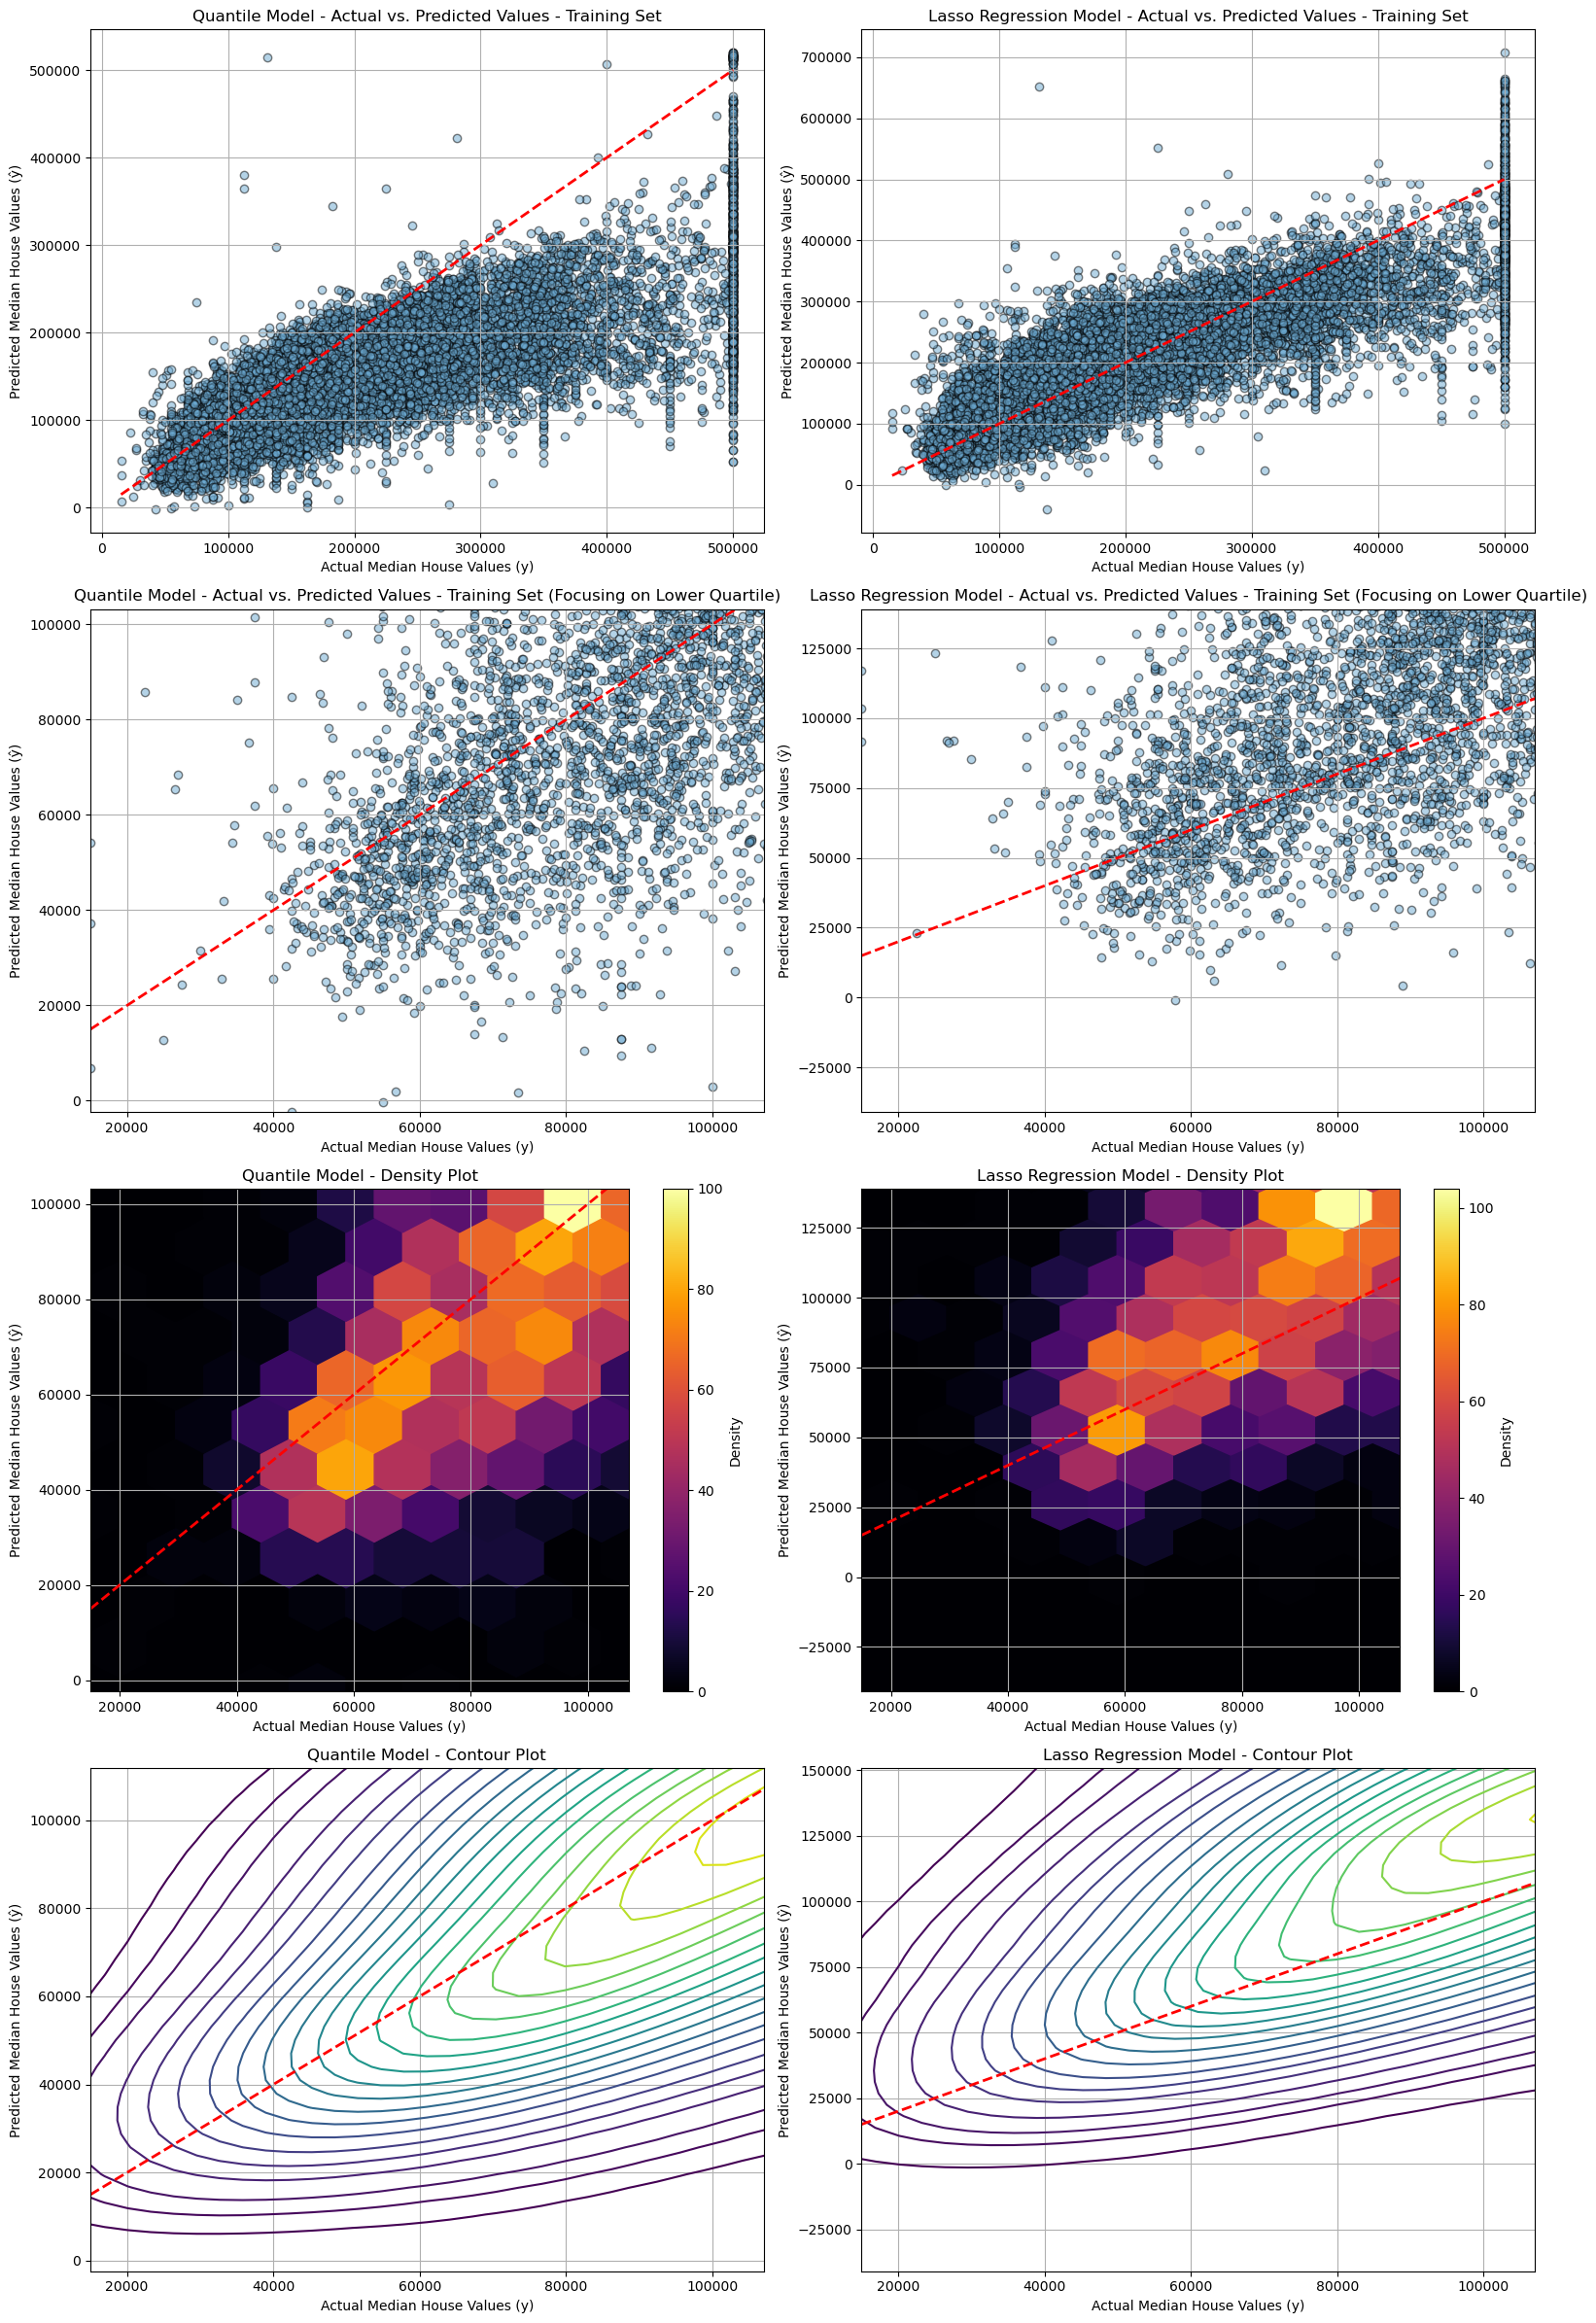

In [162]:
# Generate predictions for the training set
y_train_pred_quantile = quantile_pipe.predict(X_train)
y_train_pred_grid = grid_search.predict(X_train)

# Determine the 20th percentile of the actual values for both models
percentile_value = 20  # This should be defined in your code
q_actual = np.quantile(y_train, percentile_value / 100.0)

# Create a figure with multiple subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 24))  # 4 rows, 2 columns

# Scatter Plot for Quantile Model
axs[0, 0].scatter(y_train, y_train_pred_quantile, alpha=0.5, edgecolor='k')
axs[0, 0].set_title('Quantile Model - Actual vs. Predicted Values - Training Set')
axs[0, 0].set_xlabel('Actual Median House Values (y)')
axs[0, 0].set_ylabel('Predicted Median House Values (ŷ)')
axs[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[0, 0].grid(True)

# Scatter Plot for Lasso Regression Model
axs[0, 1].scatter(y_train, y_train_pred_grid, alpha=0.5, edgecolor='k')
axs[0, 1].set_title('Lasso Regression Model - Actual vs. Predicted Values - Training Set')
axs[0, 1].set_xlabel('Actual Median House Values (y)')
axs[0, 1].set_ylabel('Predicted Median House Values (ŷ)')
axs[0, 1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[0, 1].grid(True)

# Scatter Plot focusing on Lower Quartile for Quantile Model
axs[1, 0].scatter(y_train, y_train_pred_quantile, alpha=0.5, edgecolor='k')
axs[1, 0].set_title('Quantile Model - Actual vs. Predicted Values - Training Set (Focusing on Lower Quartile)')
axs[1, 0].set_xlabel('Actual Median House Values (y)')
axs[1, 0].set_ylabel('Predicted Median House Values (ŷ)')
axs[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[1, 0].grid(True)
axs[1, 0].set_xlim([y_train.min(), q_actual])
axs[1, 0].set_ylim([y_train_pred_quantile.min(), np.quantile(y_train_pred_quantile, 0.25)])

# Scatter Plot focusing on Lower Quartile for Lasso Regression Model
axs[1, 1].scatter(y_train, y_train_pred_grid, alpha=0.5, edgecolor='k')
axs[1, 1].set_title('Lasso Regression Model - Actual vs. Predicted Values - Training Set (Focusing on Lower Quartile)')
axs[1, 1].set_xlabel('Actual Median House Values (y)')
axs[1, 1].set_ylabel('Predicted Median House Values (ŷ)')
axs[1, 1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[1, 1].grid(True)
axs[1, 1].set_xlim([y_train.min(), q_actual])
axs[1, 1].set_ylim([y_train_pred_grid.min(), np.quantile(y_train_pred_grid, 0.25)])

# Hexbin Plot for Quantile Model
hb_quantile = axs[2, 0].hexbin(y_train, y_train_pred_quantile, gridsize=50, cmap='inferno')
axs[2, 0].set_title('Quantile Model - Density Plot')
axs[2, 0].set_xlabel('Actual Median House Values (y)')
axs[2, 0].set_ylabel('Predicted Median House Values (ŷ)')
axs[2, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[2, 0].grid(True)
axs[2, 0].set_xlim([y_train.min(), q_actual])
axs[2, 0].set_ylim([y_train_pred_quantile.min(), np.quantile(y_train_pred_quantile, 0.25)])
fig.colorbar(hb_quantile, ax=axs[2, 0], label='Density')

# Hexbin Plot for Lasso Regression Model
hb_grid = axs[2, 1].hexbin(y_train, y_train_pred_grid, gridsize=50, cmap='inferno')
axs[2, 1].set_title('Lasso Regression Model - Density Plot')
axs[2, 1].set_xlabel('Actual Median House Values (y)')
axs[2, 1].set_ylabel('Predicted Median House Values (ŷ)')
axs[2, 1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[2, 1].grid(True)
axs[2, 1].set_xlim([y_train.min(), q_actual])
axs[2, 1].set_ylim([y_train_pred_grid.min(), np.quantile(y_train_pred_grid, 0.25)])
fig.colorbar(hb_grid, ax=axs[2, 1], label='Density')

# Contour Plot for Quantile Model
sns.kdeplot(x=y_train, y=y_train_pred_quantile, ax=axs[3, 0], levels=20, cmap="viridis")
axs[3, 0].set_title('Quantile Model - Contour Plot')
axs[3, 0].set_xlabel('Actual Median House Values (y)')
axs[3, 0].set_ylabel('Predicted Median House Values (ŷ)')
axs[3, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[3, 0].grid(True)
axs[3, 0].set_xlim([y_train.min(), q_actual])
axs[3, 0].set_ylim([y_train_pred_quantile.min(), np.quantile(y_train_pred_quantile, 0.3)])

# Contour Plot for Lasso Regression Model
sns.kdeplot(x=y_train, y=y_train_pred_grid, ax=axs[3, 1], levels=20, cmap="viridis")
axs[3, 1].set_title('Lasso Regression Model - Contour Plot')
axs[3, 1].set_xlabel('Actual Median House Values (y)')
axs[3, 1].set_ylabel('Predicted Median House Values (ŷ)')
axs[3, 1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Red line for perfect predictions
axs[3, 1].grid(True)
axs[3, 1].set_xlim([y_train.min(), q_actual])
axs[3, 1].set_ylim([y_train_pred_grid.min(), np.quantile(y_train_pred_grid, 0.3)])

plt.tight_layout()
plt.show()



## <a id='toc1_7_'></a>[Conclusion](#toc0_)

In exploring California's housing market, we've unearthed the complex interplay between factors such as income, ocean proximity, and housing values. Our journey has taken us through:

- **Data Distribution Scrutiny**: We've probed into skewed and bimodal distributions, understanding their impact on our models.
- **Preprocessing Rigor**: Missing values and outliers were meticulously treated to preserve data integrity.
- **Insightful Feature Engineering**: Median_income emerged as a pivotal predictor, while ocean proximity provided additional analytical depth.
- **Exploratory Data Analysis (EDA)**: Our EDA unearthed expected and unexpected patterns, notably the sparse data in the "ISLAND" category, underscoring the need for judicious model selection.

Utilizing a scikit-learn pipeline, we seamlessly fused statistical theory with machine learning efficiency, resulting in a model that's both precise and widely applicable. This iterative process is the quintessence of data science—melding concept with practice to refine our predictive acumen.

- **Model Performance in Context**: The model's RMSE of about $65,511 points to its suitability for higher-end markets, where errors are relatively minor compared to overall values.
- **Quantile Regression's Edge**: By focusing on median rather than mean values, Quantile Regression yielded a more tailored fit for our skewed dataset. It shined for properties around the $100,000 mark, where the standard OLS model's RMSE was less reliable.
- **Visual and Statistical Validation**: Enhanced accuracy and precision were visually confirmed through hexbin and contour plots, especially for lower-value properties.

Through this analytical voyage, we have not only solidified core insights but also set the stage for future machine learning explorations, stressing the fine balance between embracing data complexity and striving for simplicity in our models.

**Questions?**

Feel free to ask any questions or provide feedback.

<div style="text-align: left;">
<a href="https://freeimage.host/i/HXsIQUv"><img src="https://iili.io/HXsIQUv.md.jpg" alt="HXsIQUv.md.jpg" border="0" width="450"></a>
</div>